In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_12_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period      s1a     s1x     s1i  \
datetime                                                                     
2013-03-12 00:10:00  2013-03-12  00:10:00     600  5.39852  5.9126  4.4897   
2013-03-12 00:20:00  2013-03-12  00:20:00     600  5.84834  6.4175  4.7192   
2013-03-12 00:30:00  2013-03-12  00:30:00     600  6.05489  6.5552  5.4077   
2013-03-12 00:40:00  2013-03-12  00:40:00     600  6.07325  6.9683  4.9028   
2013-03-12 00:50:00  2013-03-12  00:50:00     600  6.32111  7.2437  5.3618   

                         s1s      s2a     s2x     s2i  ...  tii  vxa  vxx  \
datetime                                               ...                  
2013-03-12 00:10:00  0.31212  4.00216  5.5903  2.7904  ...   45  126  126   
2013-03-12 00:20:00  0.29835  4.47952  5.9116  2.7904  ...   44  126  126   
2013-03-12 00:30:00  0.19737  4.64017  5.7739  3.2035  ...   44  126  126   
2013-03-12 00:40:00  0.34884  4.82377  6.1870  3.3412  ...   44  126  126   
2013-03-12 00:50:00  0.28458  4.65853  6.7378  3.3412  ...   44  126  126   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-12 00:10:00  126   83   83   83   83   83   83  
2013-03-12 00:20:00  126   83   83   83   83   83   83  
2013-03-12 00:30:00  126   83   83   83   83   83   83  
2013-03-12 00:40:00  126   83   83   83   83   83   83  
2013-03-12 00:50:00  126   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       4.764877
std        1.441076
min        0.849830
25%        3.920540
50%        4.716905
75%        5.481140
max        8.170880
Name: s1a, dtype: float64


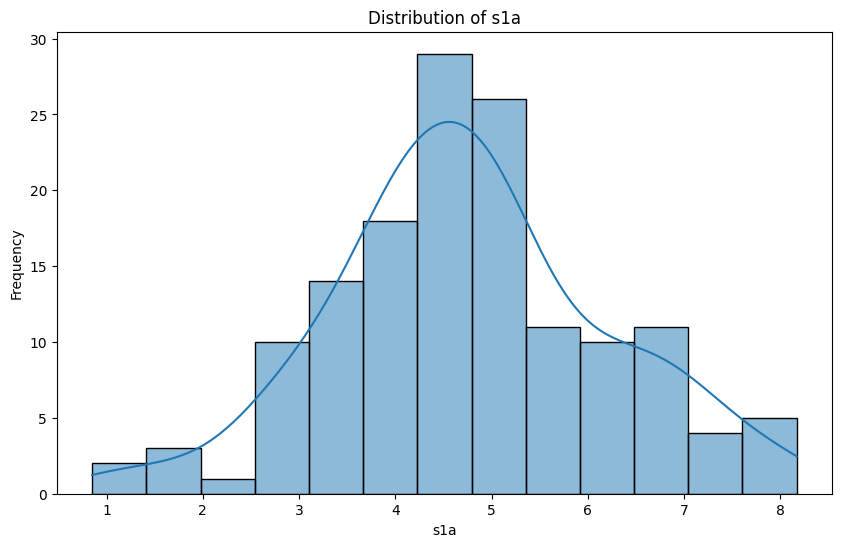


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean       5.904631
std        1.448990
min        2.011100
25%        5.132300
50%        5.729000
75%        6.566675
max        9.814100
Name: s1x, dtype: float64


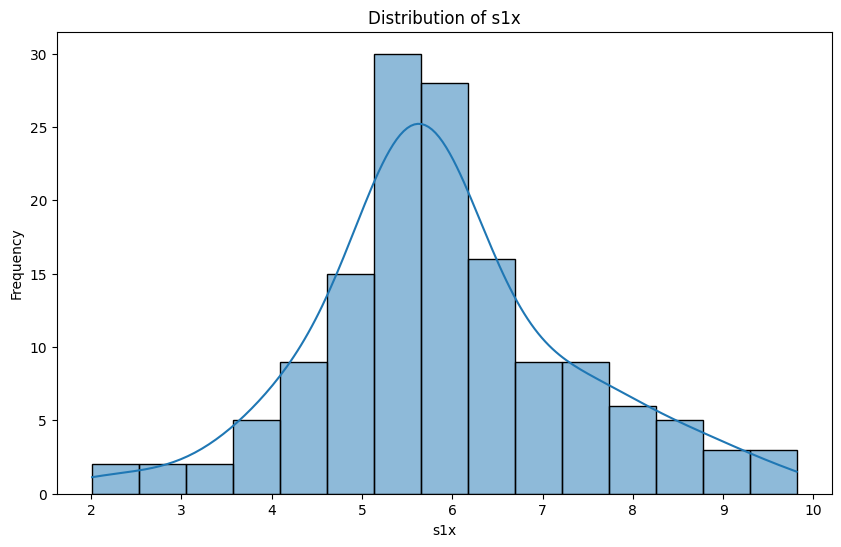


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       3.568513
std        1.403143
min        0.221000
25%        2.642225
50%        3.456950
75%        4.443800
max        6.968300
Name: s1i, dtype: float64


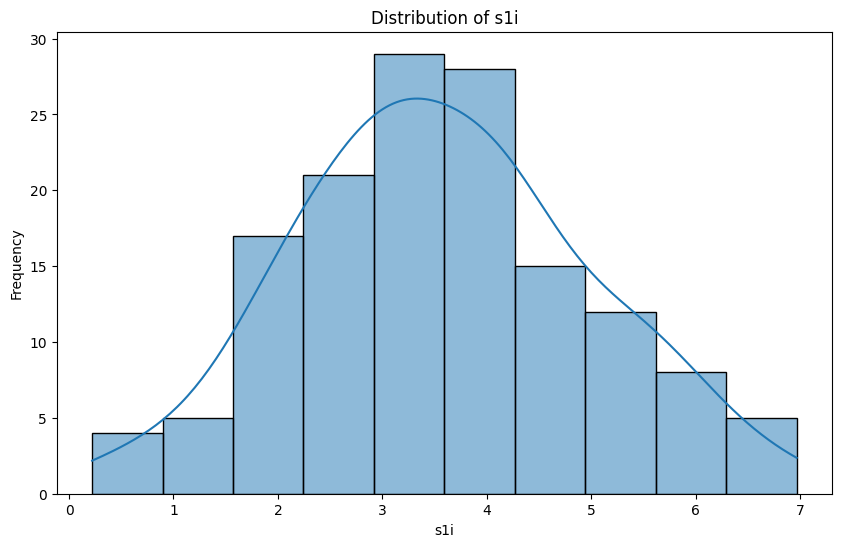


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.449437
std        0.147313
min        0.197370
25%        0.352282
50%        0.415395
75%        0.532440
max        0.945540
Name: s1s, dtype: float64


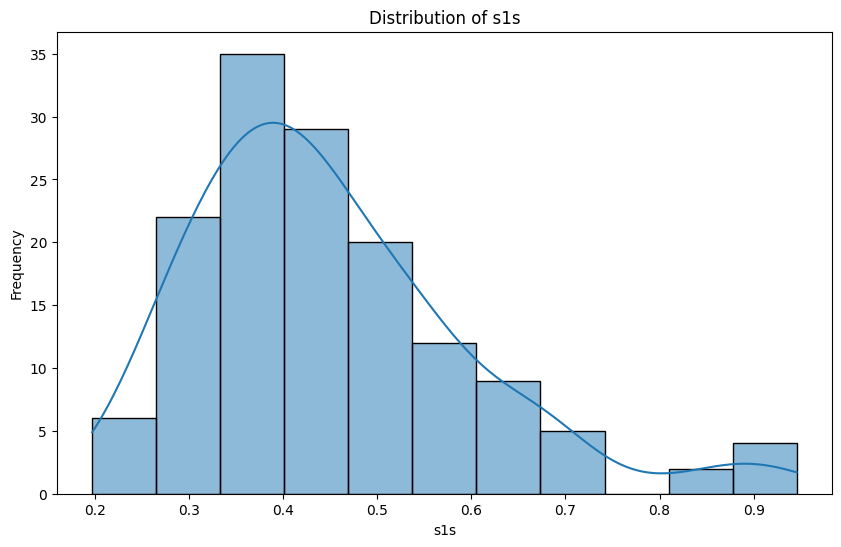


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       4.415802
std        1.200798
min        0.862600
25%        3.717580
50%        4.451980
75%        5.067040
max        7.467610
Name: s2a, dtype: float64


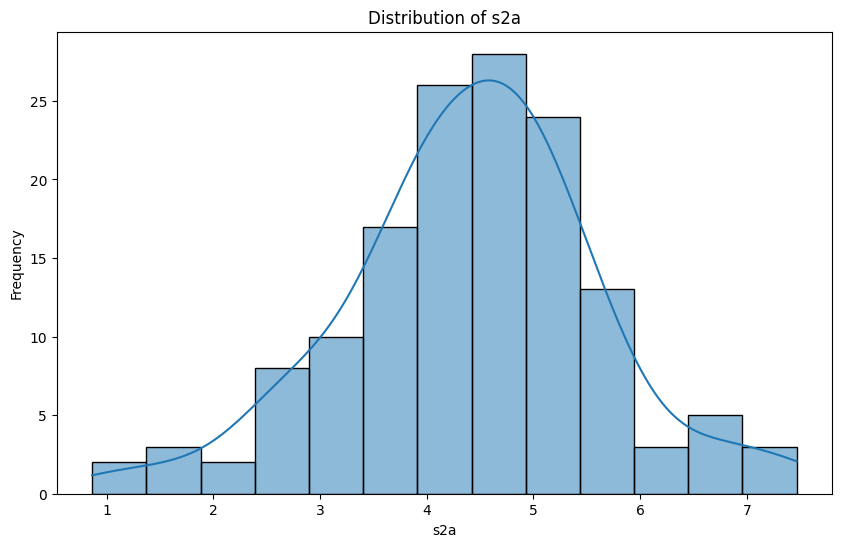


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean       5.756369
std        1.357778
min        1.872400
25%        5.085400
50%        5.705050
75%        6.278800
max        9.767200
Name: s2x, dtype: float64


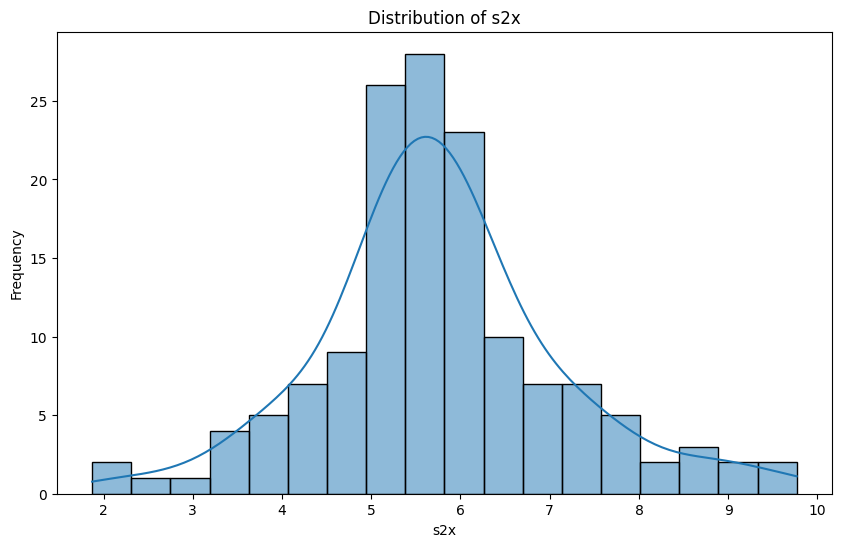


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       2.977506
std        1.025883
min        0.220000
25%        2.285500
50%        3.111700
75%        3.754300
max        5.223100
Name: s2i, dtype: float64


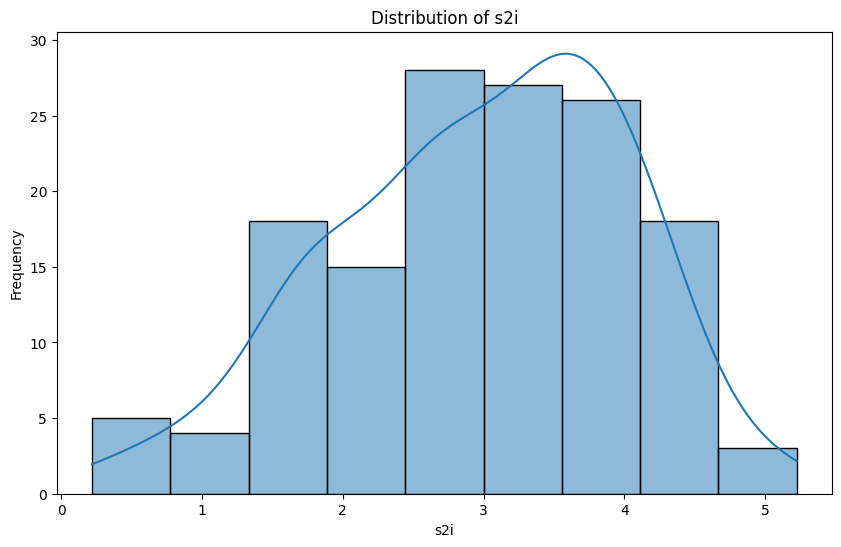


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.564092
std        0.226463
min        0.243270
25%        0.379822
50%        0.548505
75%        0.689647
max        1.280610
Name: s2s, dtype: float64


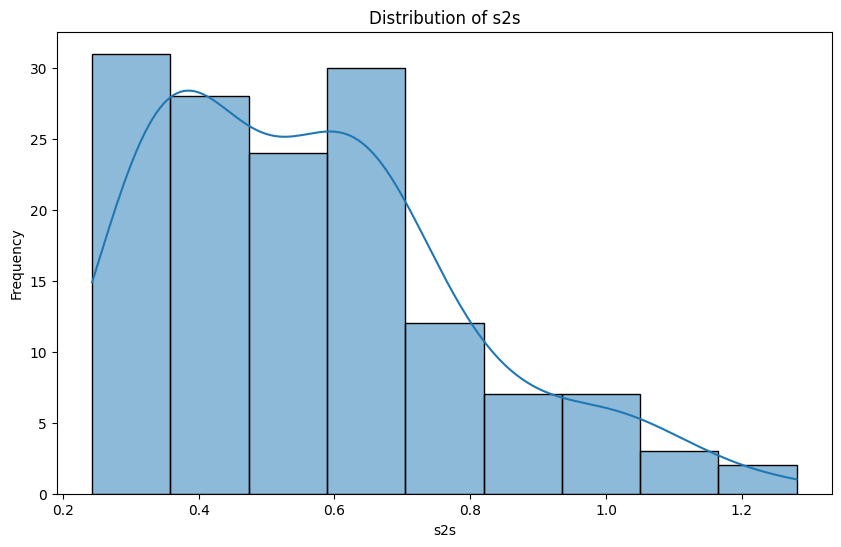


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       4.281507
std        1.193259
min        0.975270
25%        3.677013
50%        4.268735
75%        4.884538
max        7.479630
Name: s3a, dtype: float64


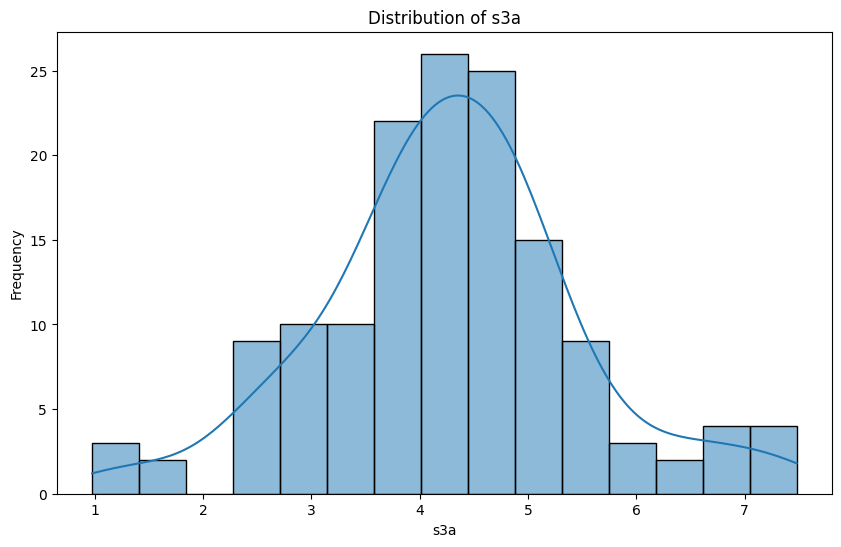


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean       5.664010
std        1.346146
min        1.599100
25%        4.982012
50%        5.635660
75%        6.186100
max        9.534610
Name: s3x, dtype: float64


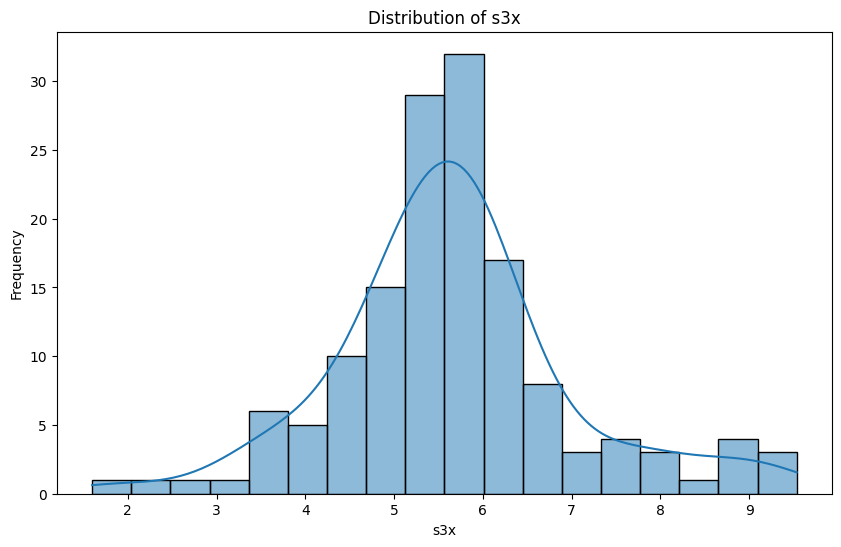


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       2.863392
std        1.014821
min        0.360610
25%        2.229812
50%        2.952265
75%        3.628848
max        5.498050
Name: s3i, dtype: float64


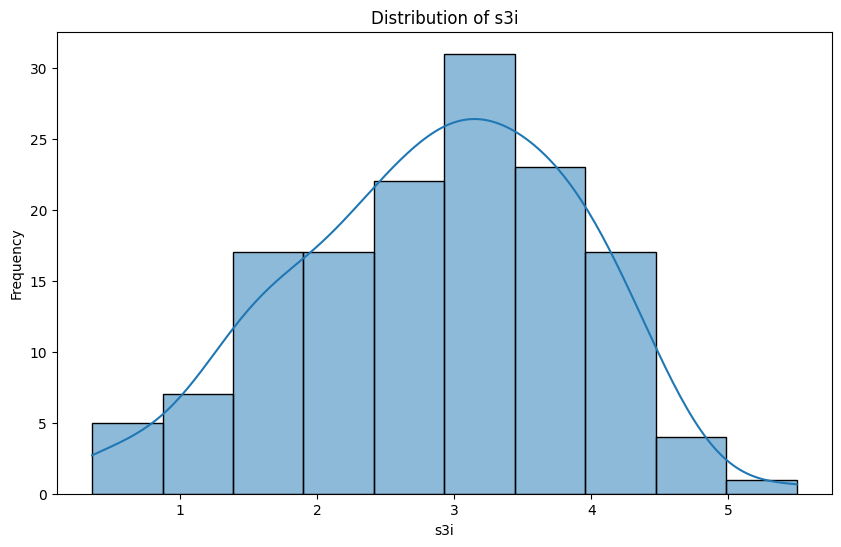


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.558882
std        0.221977
min        0.243110
25%        0.397922
50%        0.506865
75%        0.680025
max        1.307290
Name: s3s, dtype: float64


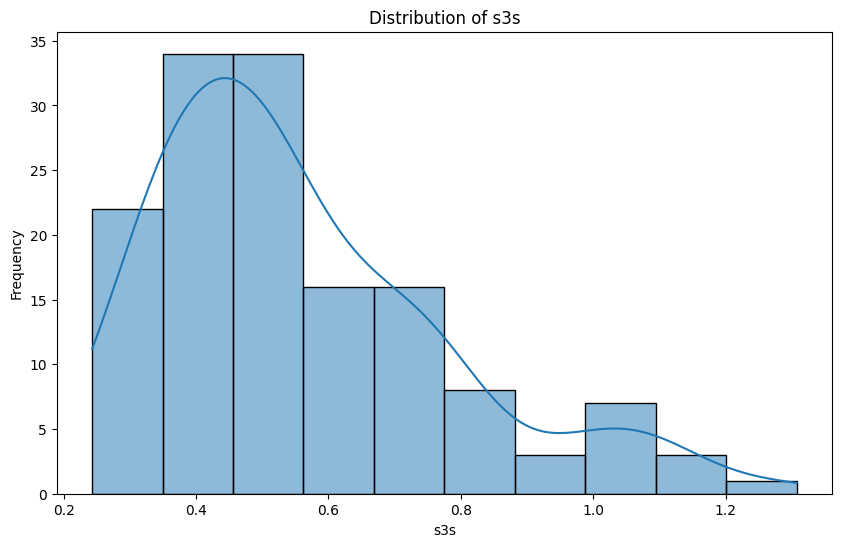


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     198.784722
std       20.432103
min      159.000000
25%      180.750000
50%      196.500000
75%      216.000000
max      248.000000
Name: d1a, dtype: float64


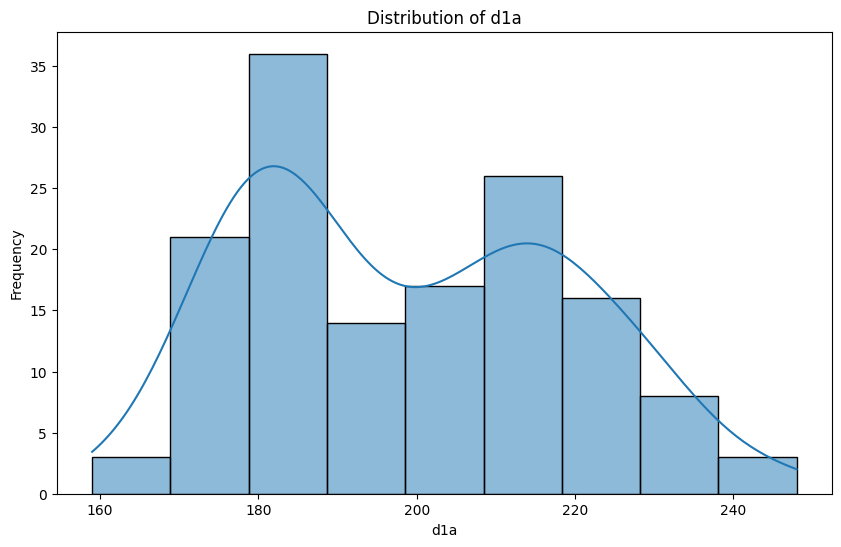


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       6.388889
std        3.881300
min        2.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       33.000000
Name: d1s, dtype: float64


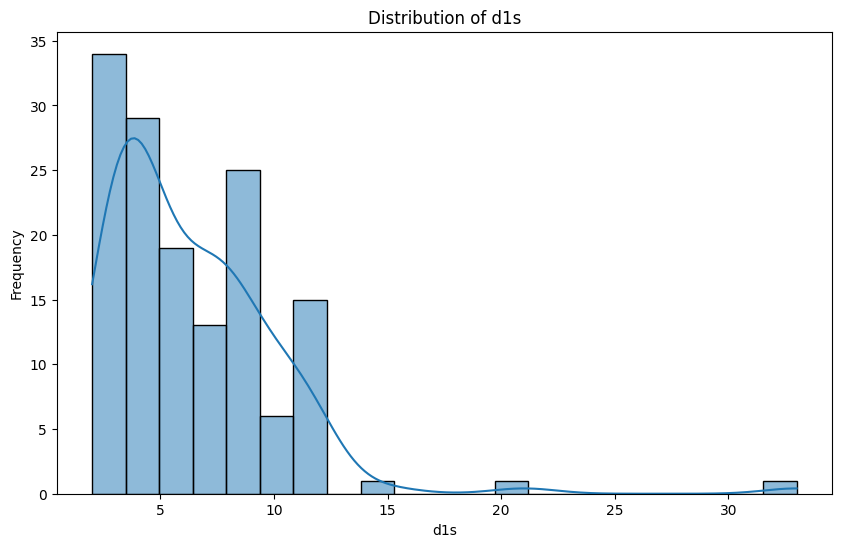


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     198.090278
std       20.101808
min      148.000000
25%      181.000000
50%      197.000000
75%      214.250000
max      249.000000
Name: d2a, dtype: float64


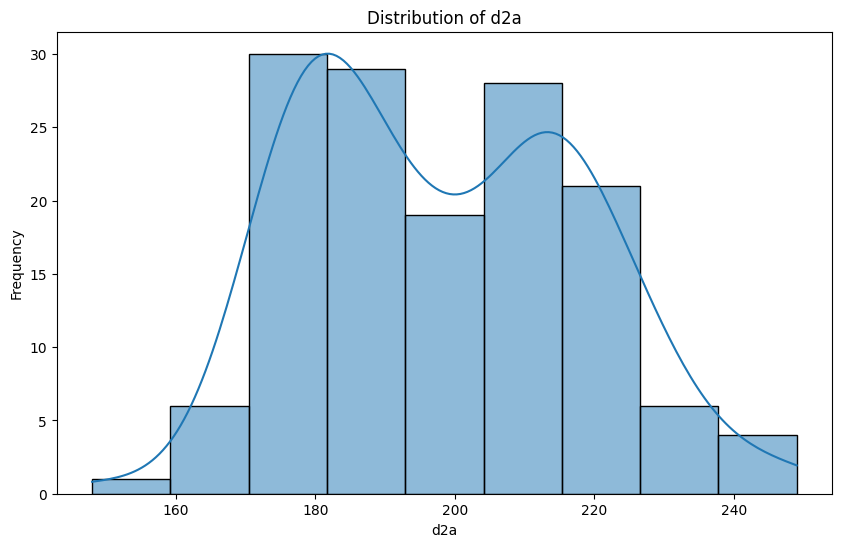


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       7.625000
std        3.549599
min        3.000000
25%        5.000000
50%        7.000000
75%       10.000000
max       17.000000
Name: d2s, dtype: float64


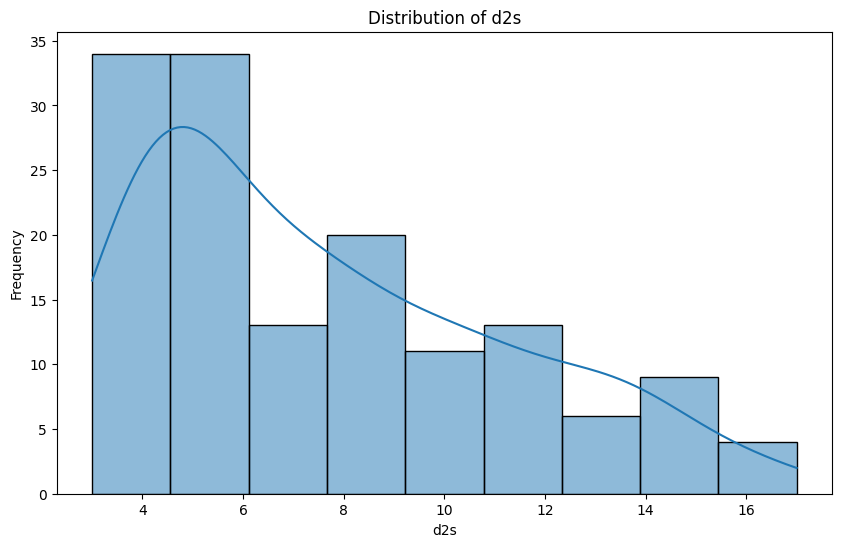


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean     100.916667
std        3.289100
min       95.000000
25%       98.000000
50%      101.000000
75%      105.000000
max      105.000000
Name: h1a, dtype: float64


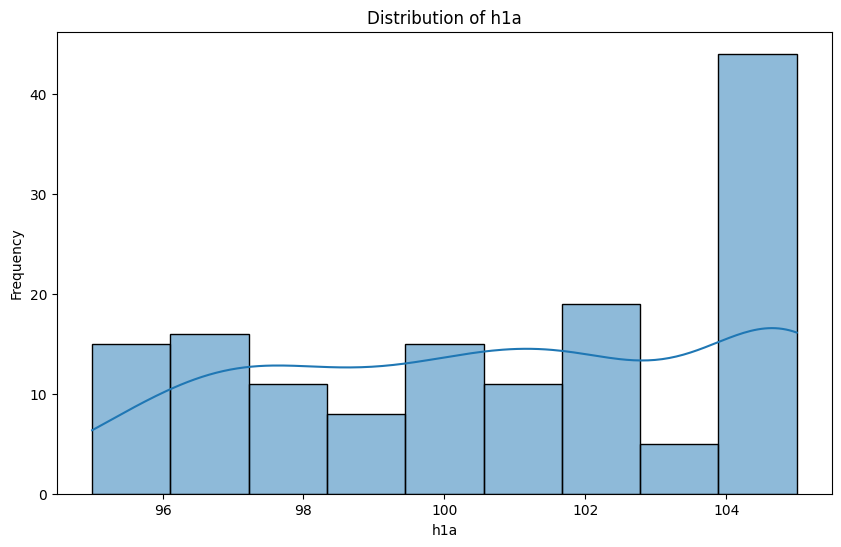


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean     101.083333
std        3.213825
min       95.000000
25%       98.000000
50%      101.000000
75%      105.000000
max      106.000000
Name: h1x, dtype: float64


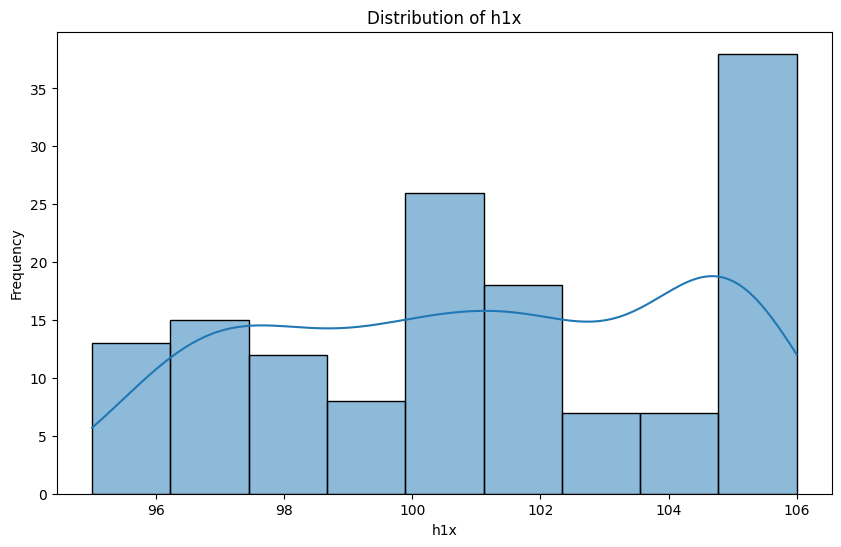


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean     100.729167
std        3.330761
min       95.000000
25%       98.000000
50%      101.000000
75%      104.000000
max      105.000000
Name: h1i, dtype: float64


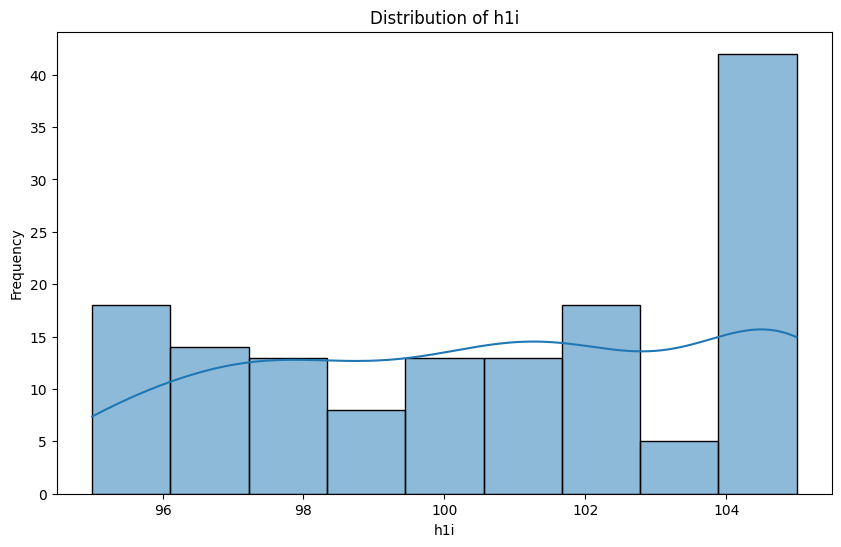


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       1.827083
std        0.665085
min        0.950000
25%        1.350000
50%        1.650000
75%        2.375000
max        3.650000
Name: t1a, dtype: float64


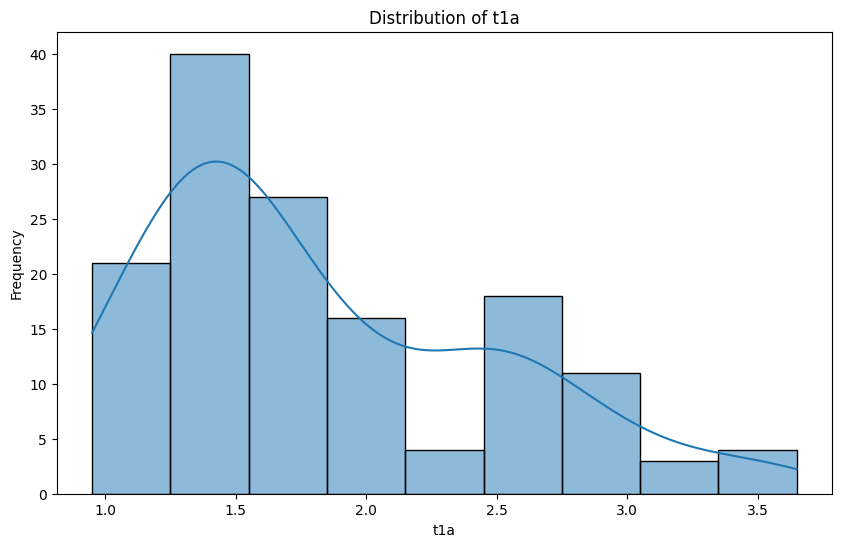


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       1.879861
std        0.673170
min        0.950000
25%        1.425000
50%        1.700000
75%        2.450000
max        3.750000
Name: t1x, dtype: float64


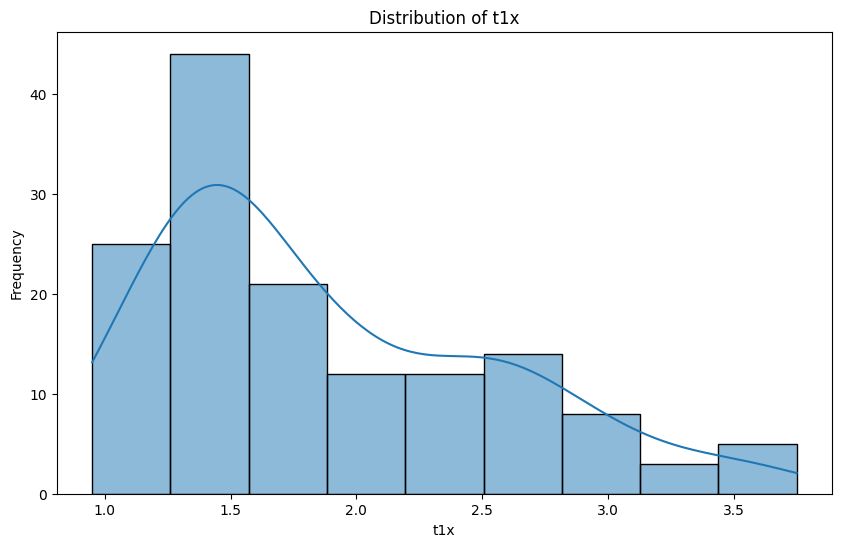


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       1.772917
std        0.666975
min        0.850000
25%        1.350000
50%        1.600000
75%        2.275000
max        3.650000
Name: t1i, dtype: float64


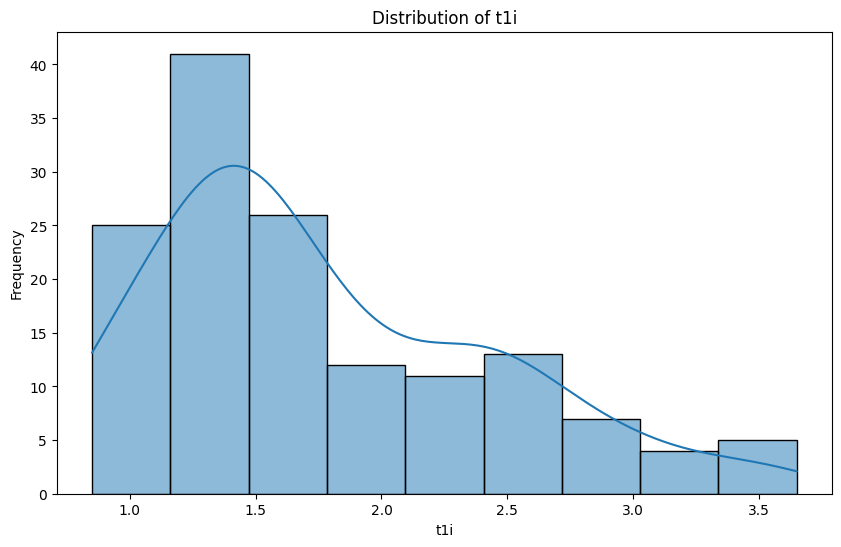


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1000.444444
std         1.383104
min       997.000000
25%      1000.000000
50%      1001.000000
75%      1001.000000
max      1002.000000
Name: b1a, dtype: float64


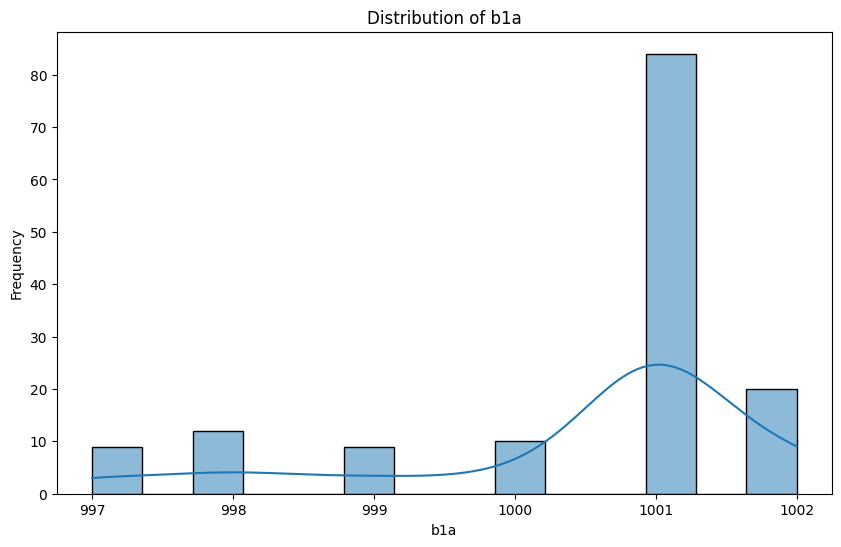


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1000.798611
std         1.335790
min       998.000000
25%      1001.000000
50%      1001.000000
75%      1002.000000
max      1002.000000
Name: b1x, dtype: float64


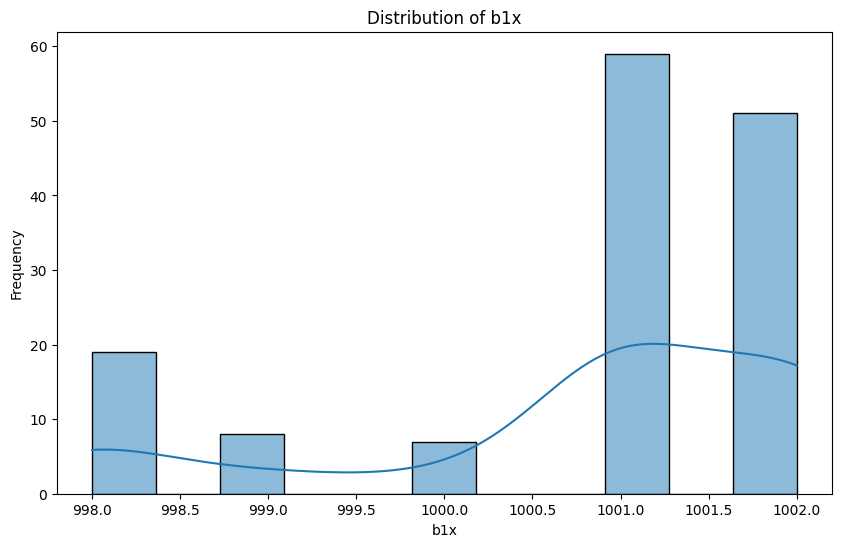


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1000.104167
std         1.392883
min       997.000000
25%      1000.000000
50%      1001.000000
75%      1001.000000
max      1002.000000
Name: b1i, dtype: float64


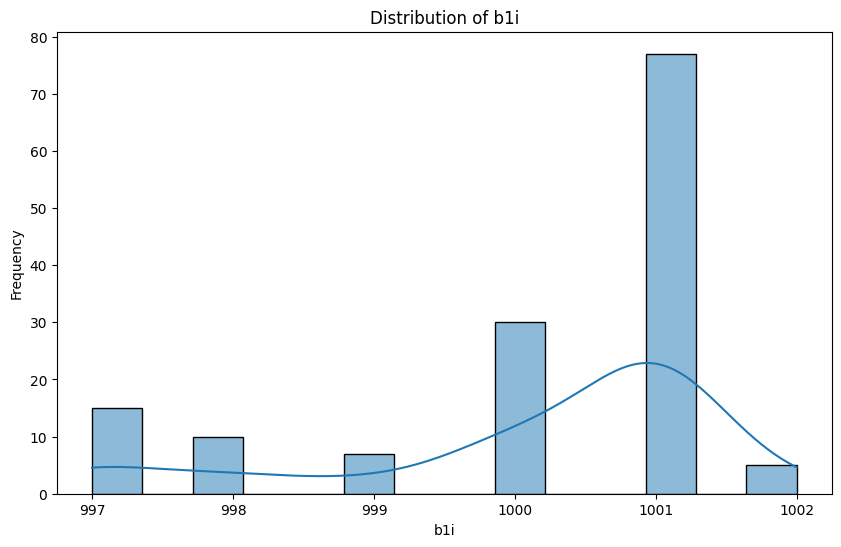


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       4.130187
std        1.062541
min        1.007450
25%        3.630075
50%        4.111495
75%        4.727028
max        6.614910
Name: p1a, dtype: float64


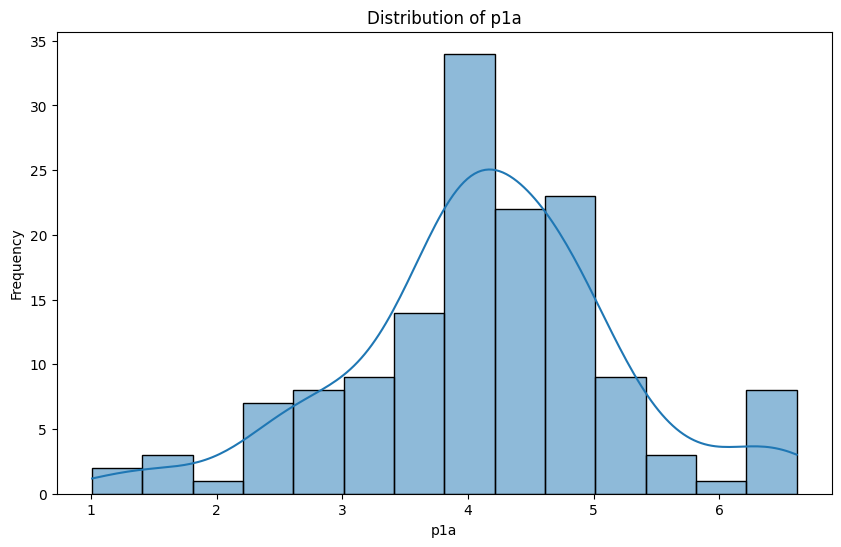


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       5.595634
std        1.269923
min        1.832750
25%        4.904700
50%        5.546600
75%        6.188500
max        9.077050
Name: p1x, dtype: float64


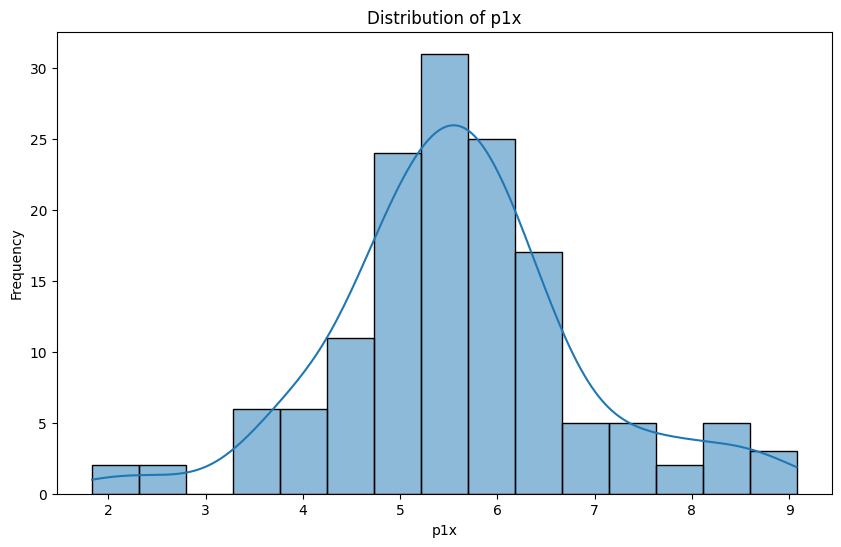


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       2.708039
std        0.920663
min        0.228000
25%        2.004688
50%        2.864375
75%        3.448962
max        4.629600
Name: p1i, dtype: float64


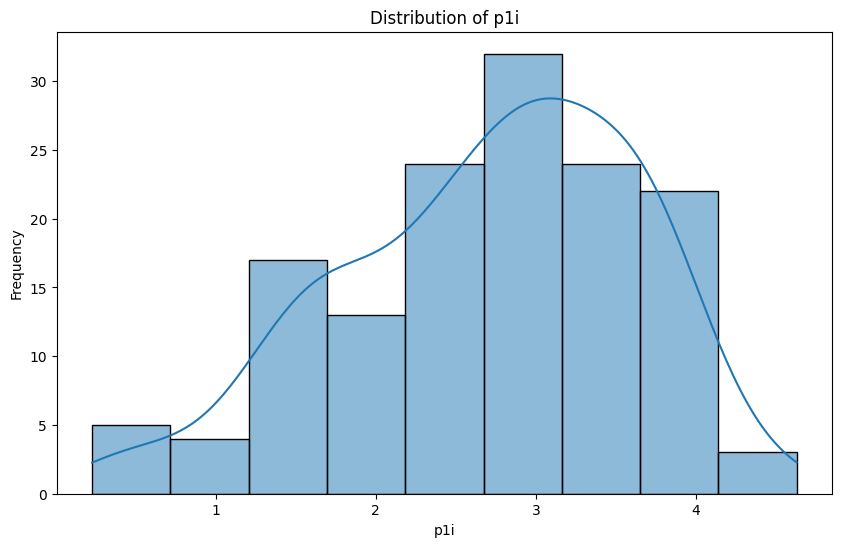


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.577362
std        0.210656
min        0.261350
25%        0.421820
50%        0.518110
75%        0.683170
max        1.182930
Name: p1s, dtype: float64


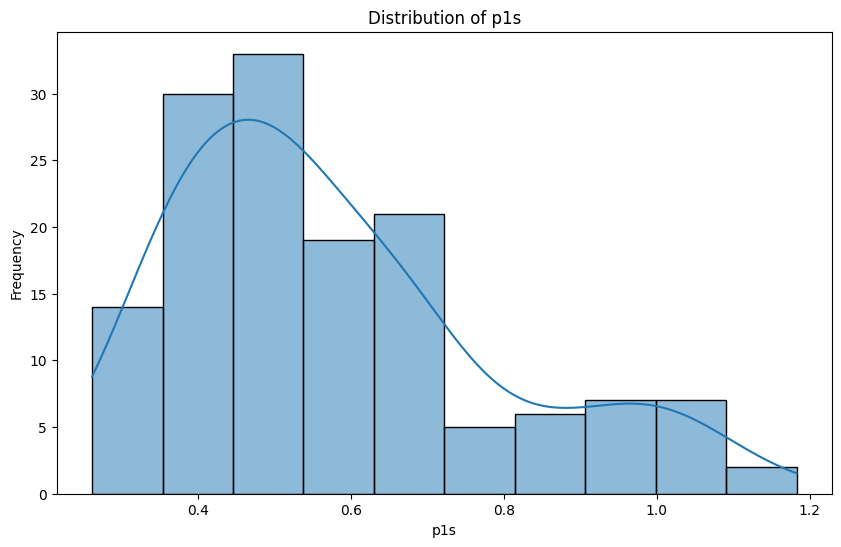


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      43.229167
std        1.227418
min       42.000000
25%       42.000000
50%       43.000000
75%       44.000000
max       46.000000
Name: tia, dtype: float64


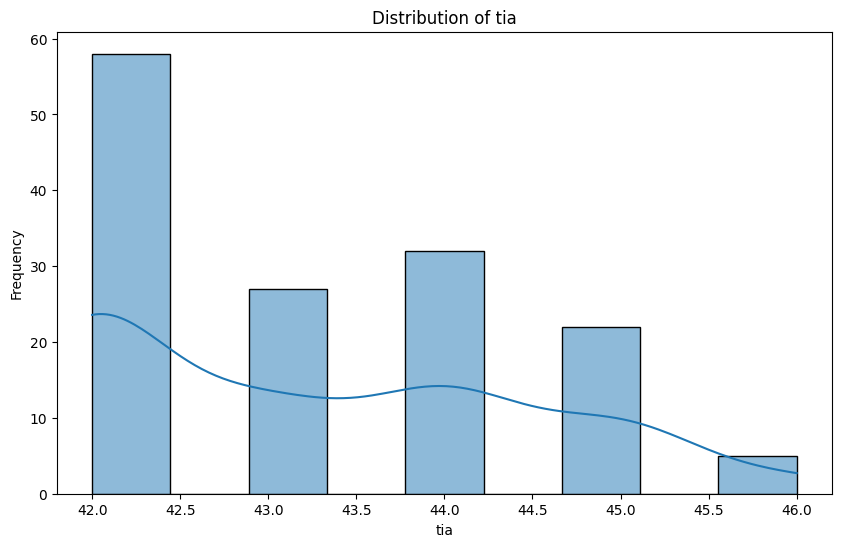


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      43.250000
std        1.226171
min       42.000000
25%       42.000000
50%       43.000000
75%       44.000000
max       46.000000
Name: tix, dtype: float64


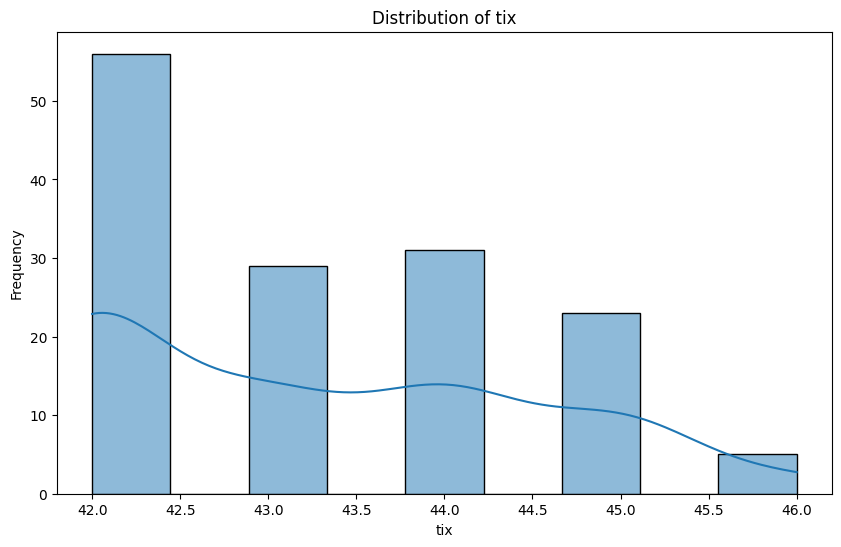


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      43.173611
std        1.184574
min       42.000000
25%       42.000000
50%       43.000000
75%       44.000000
max       46.000000
Name: tii, dtype: float64


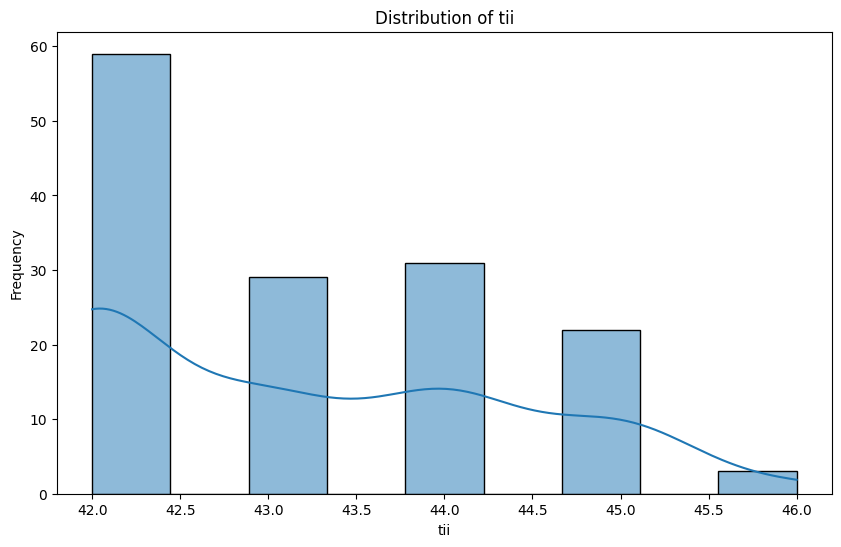


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.312500
std        5.750608
min      125.000000
25%      126.000000
50%      127.000000
75%      138.000000
max      139.000000
Name: vxa, dtype: float64


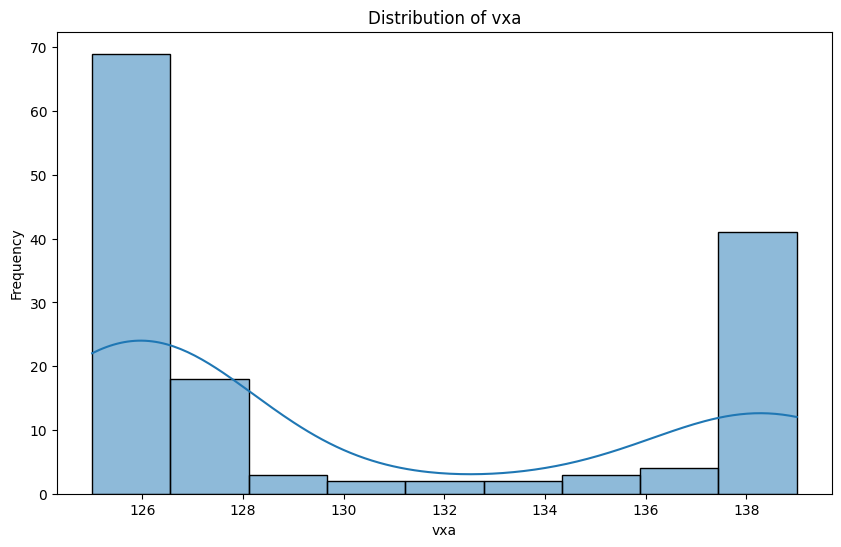


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     130.659722
std        6.088121
min      125.000000
25%      126.000000
50%      127.000000
75%      138.000000
max      142.000000
Name: vxx, dtype: float64


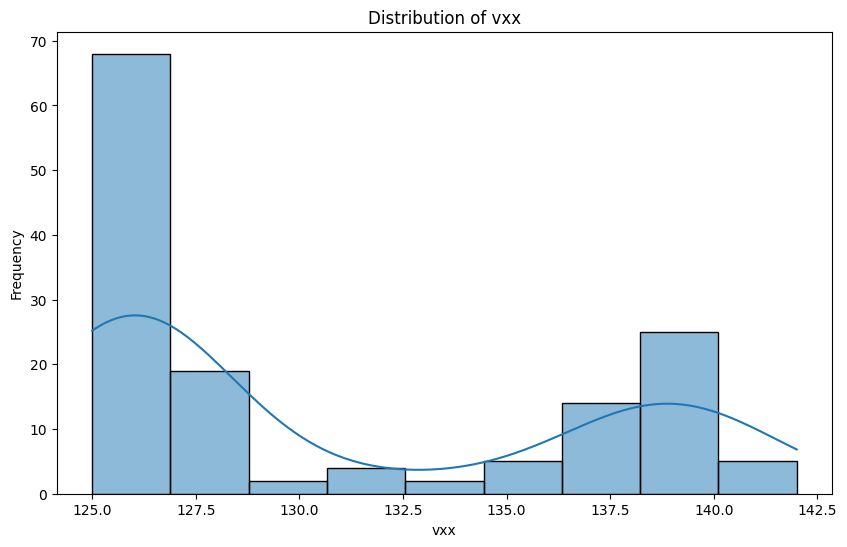


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     129.937500
std        5.501708
min      125.000000
25%      126.000000
50%      126.000000
75%      137.250000
max      139.000000
Name: vxi, dtype: float64


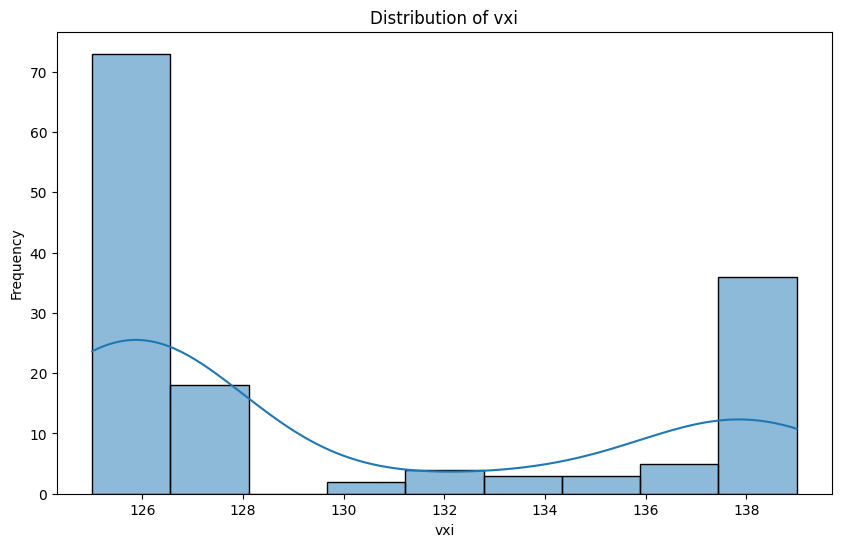


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


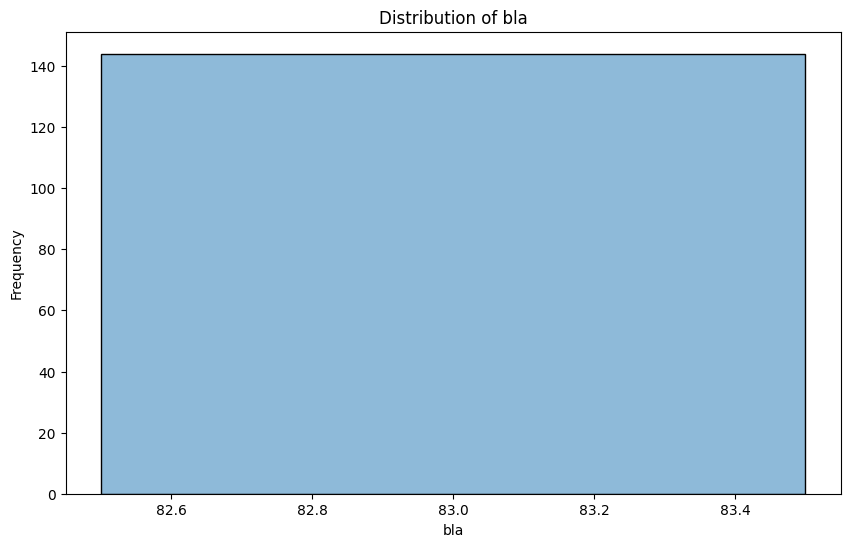


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


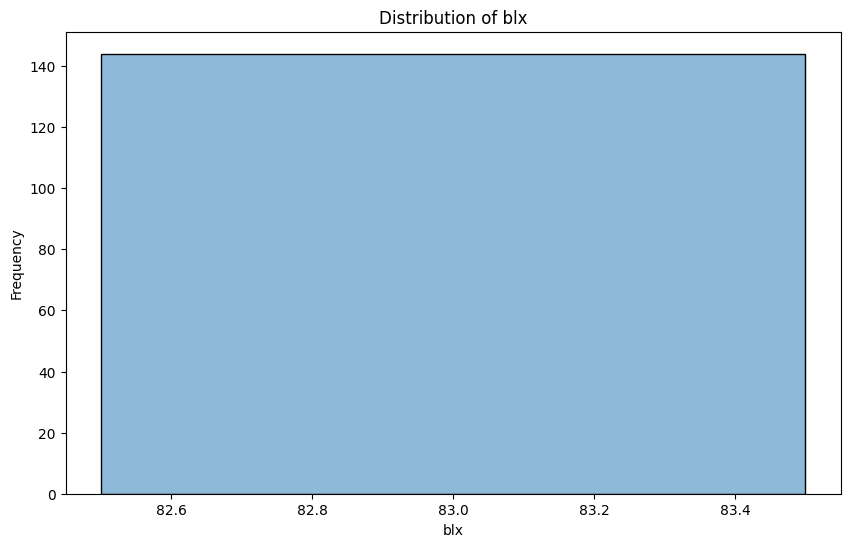


Analysis for column: bli
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bli, dtype: float64


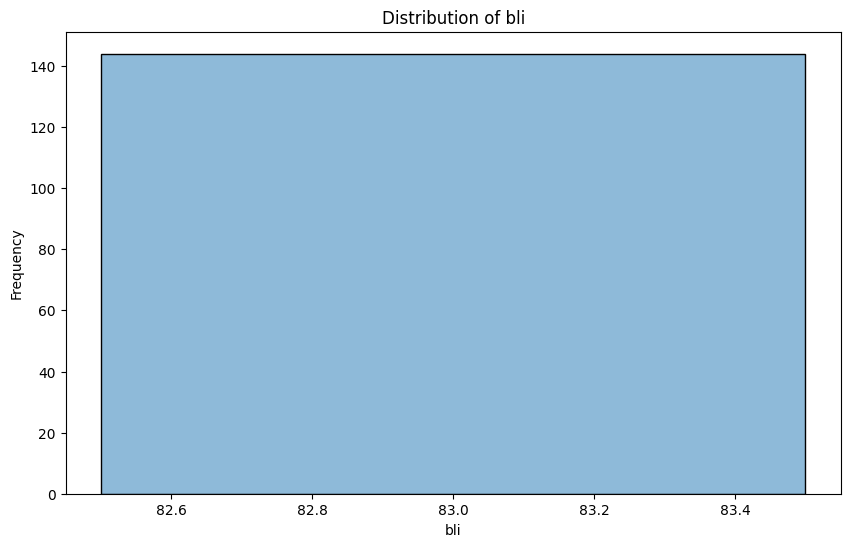


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


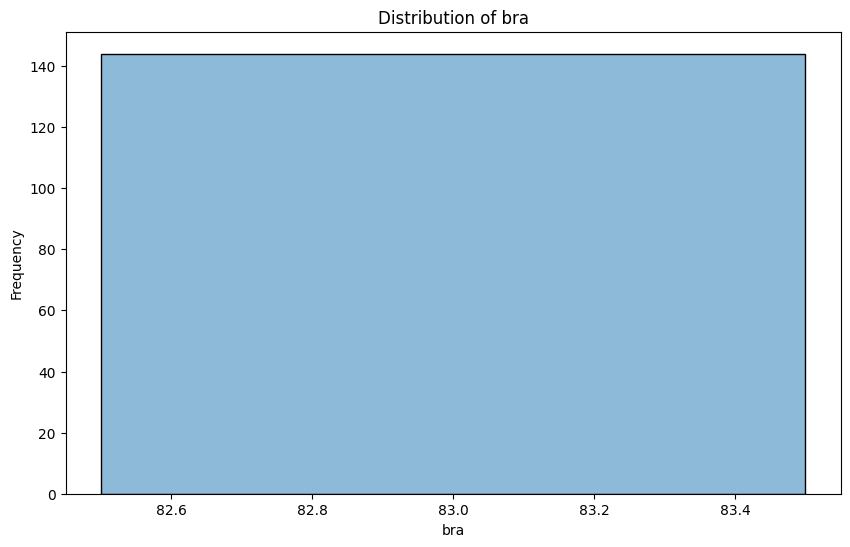


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


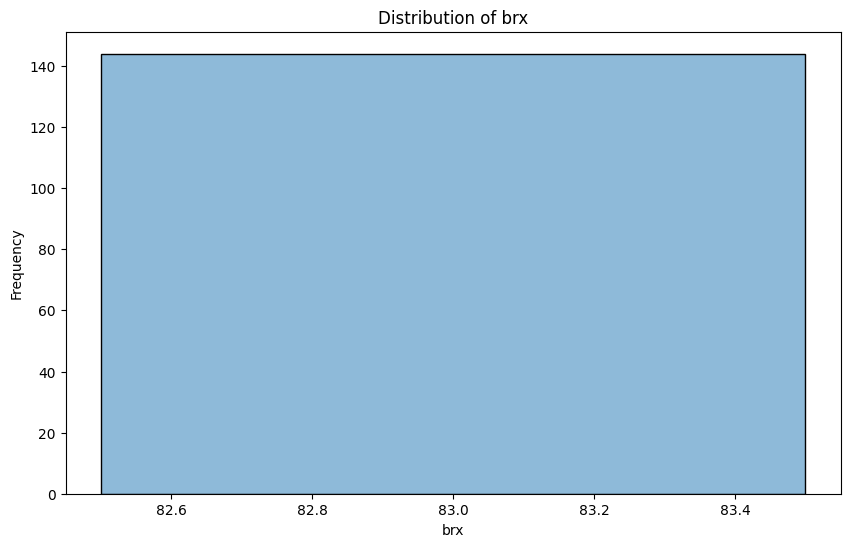


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


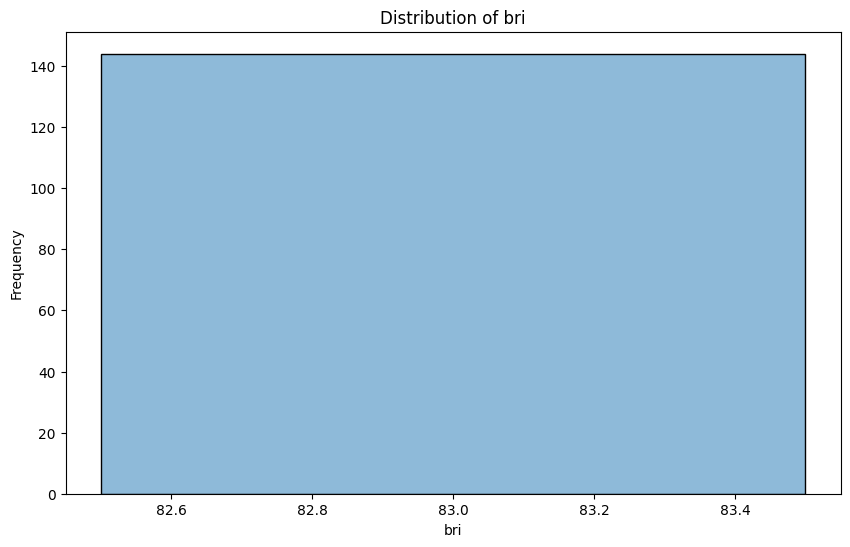

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

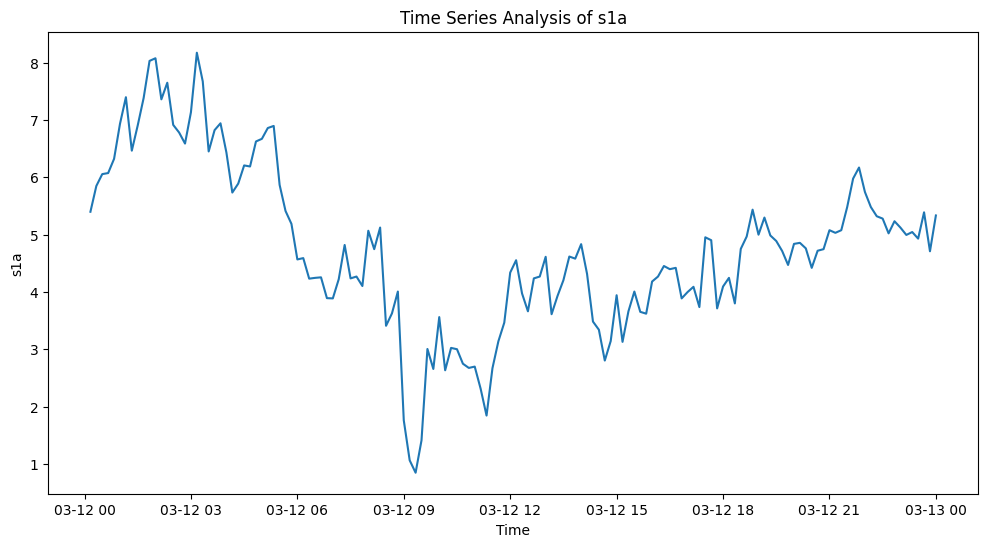

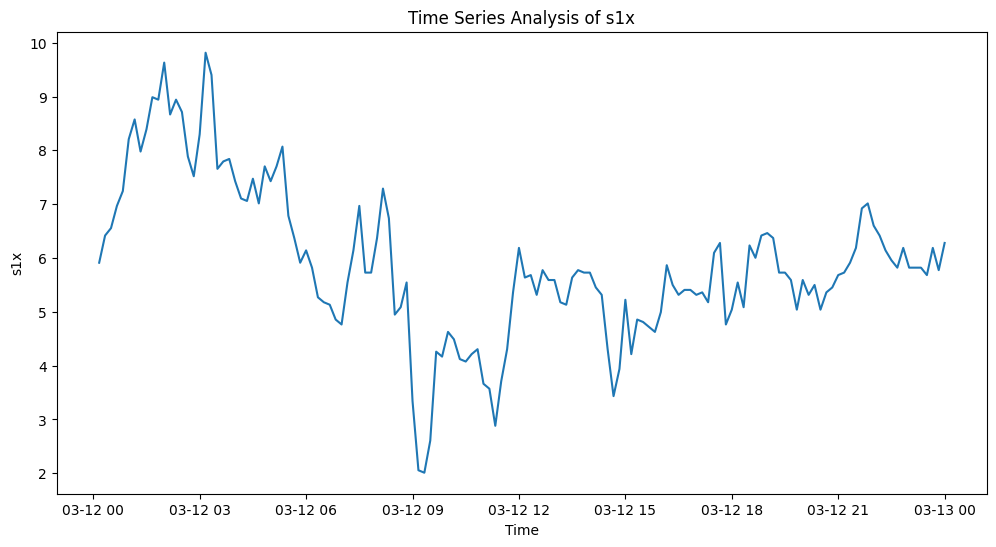

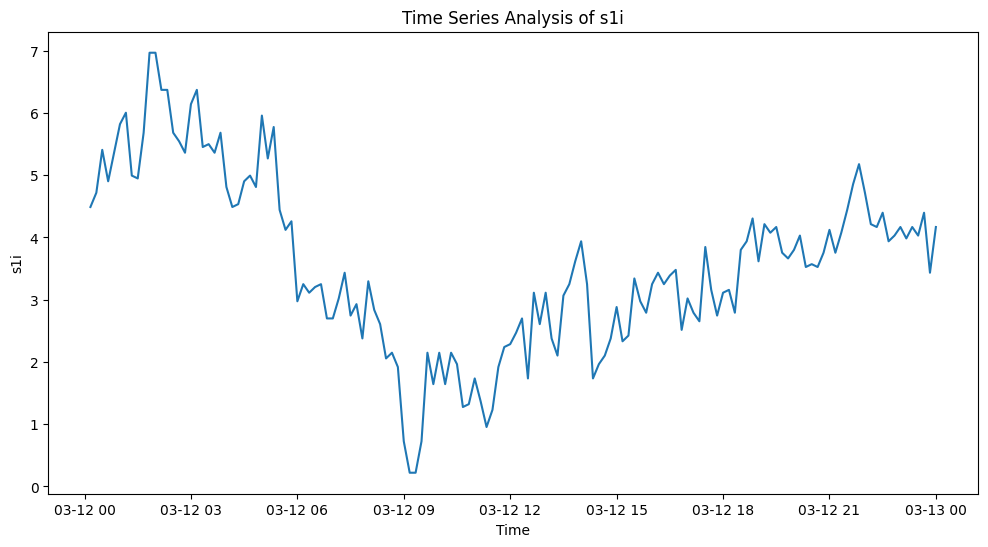

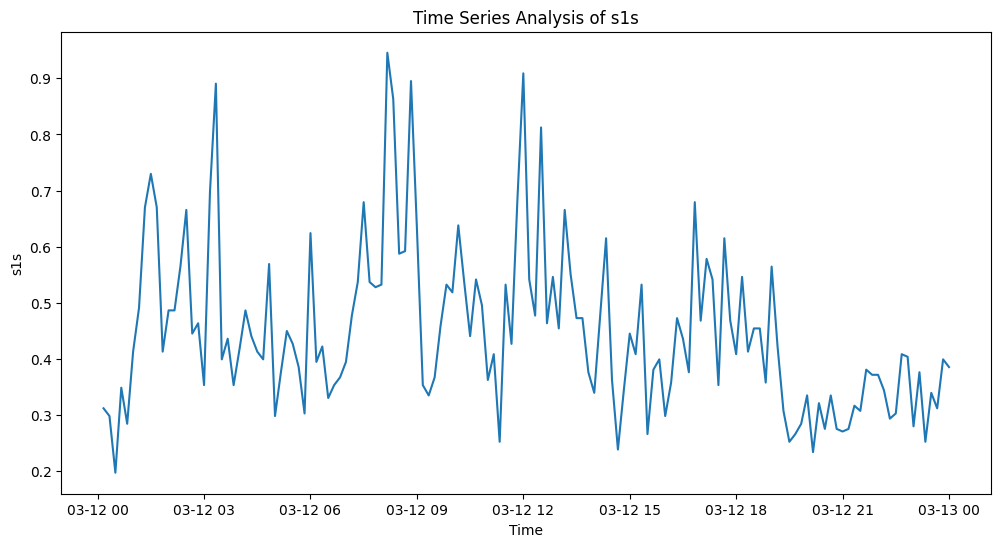

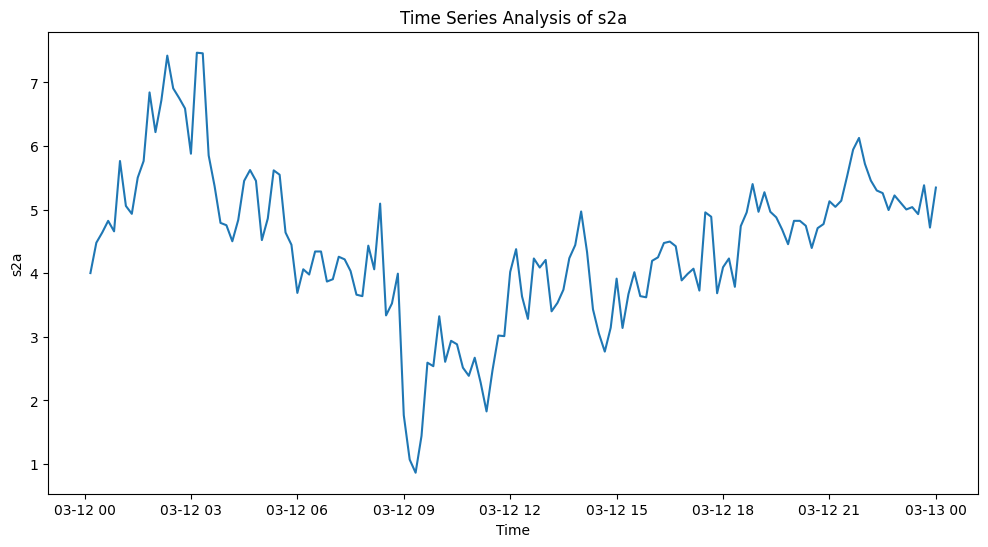

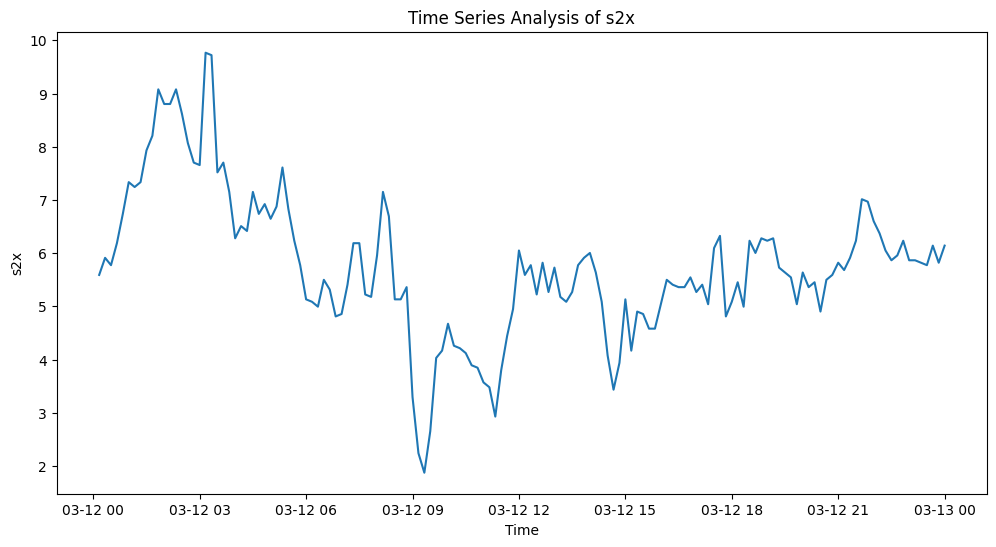

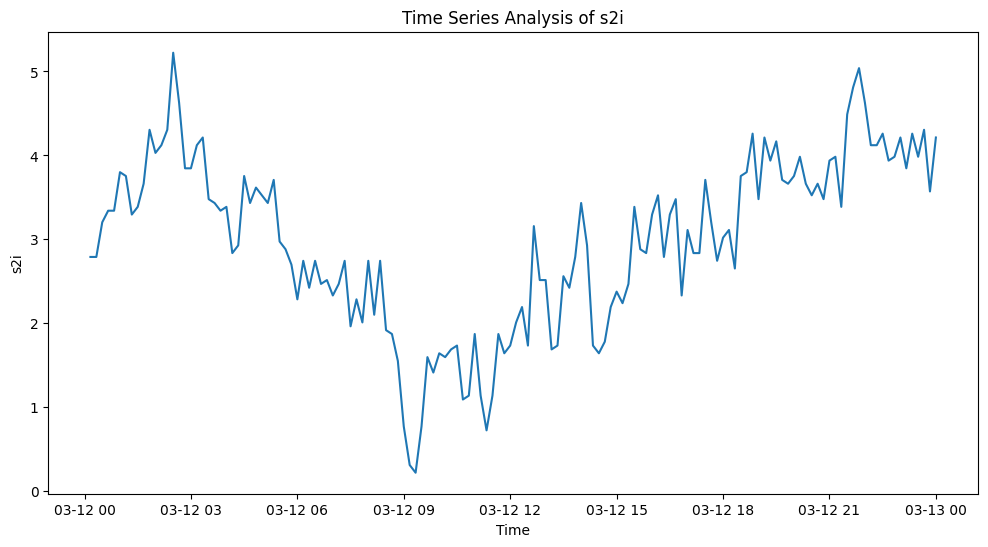

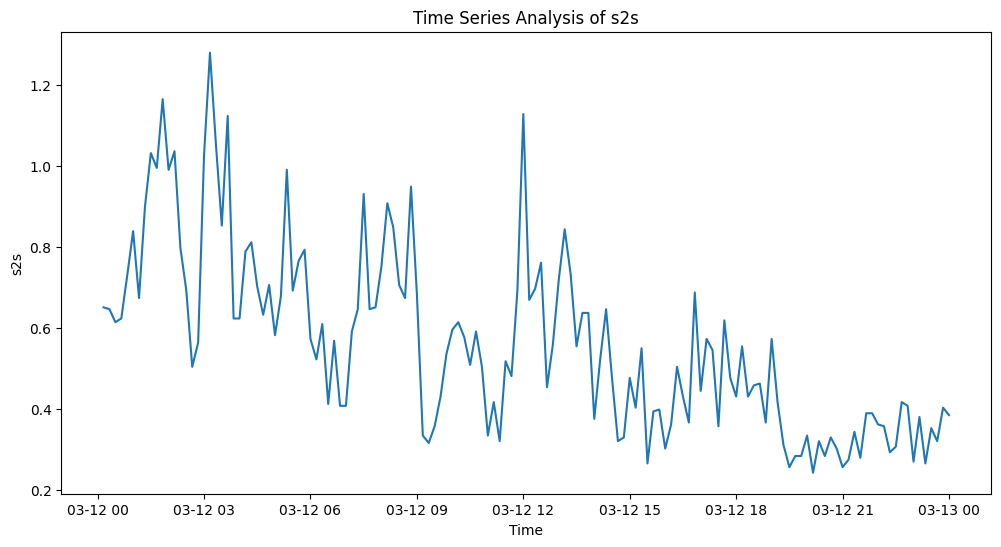

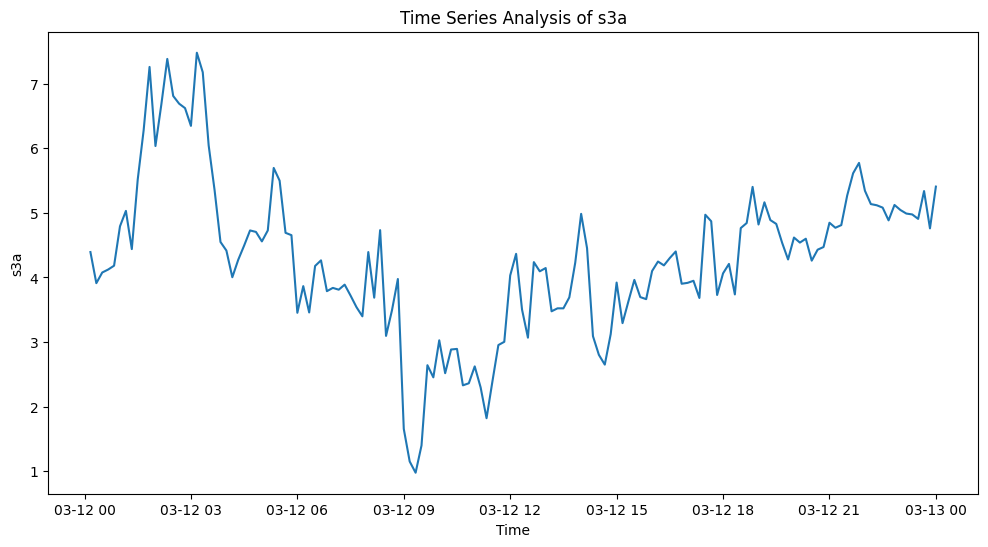

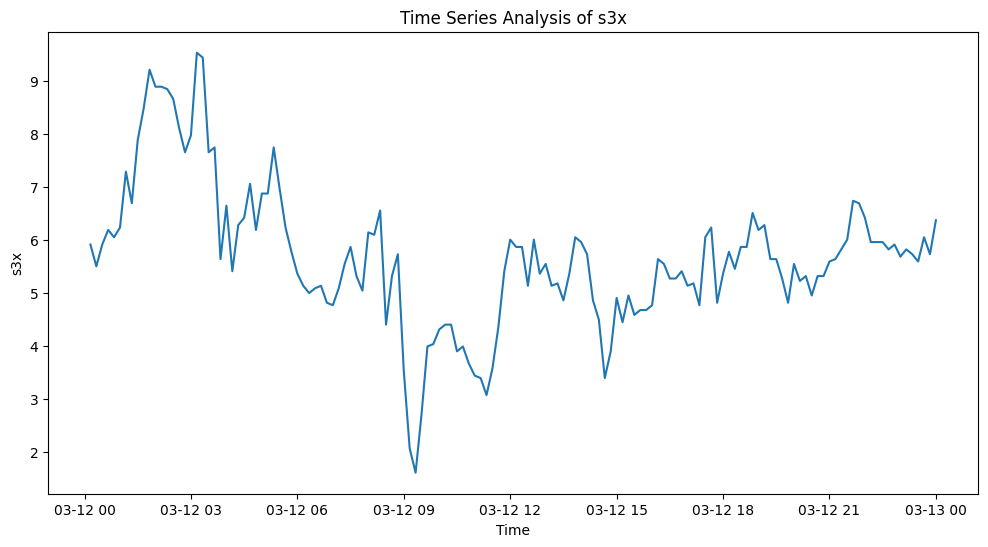

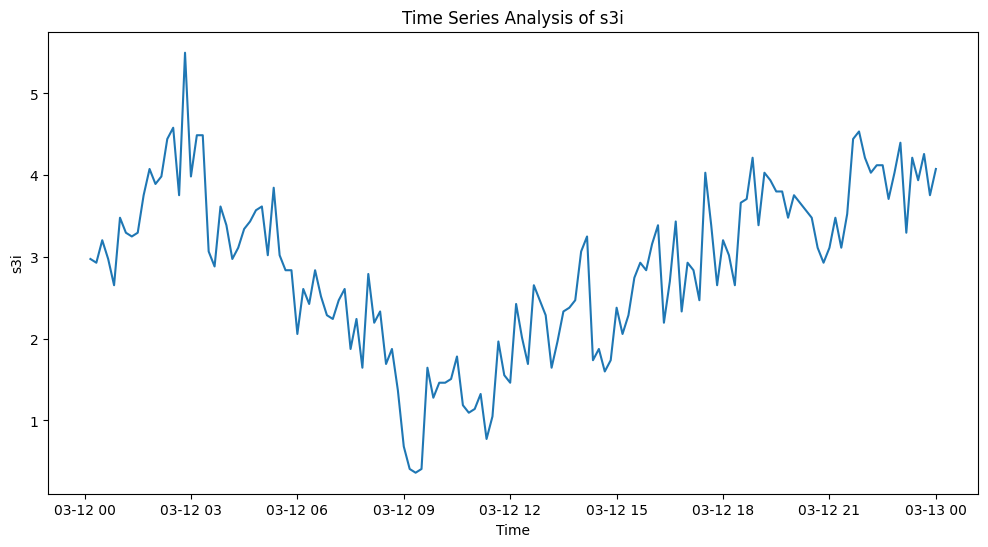

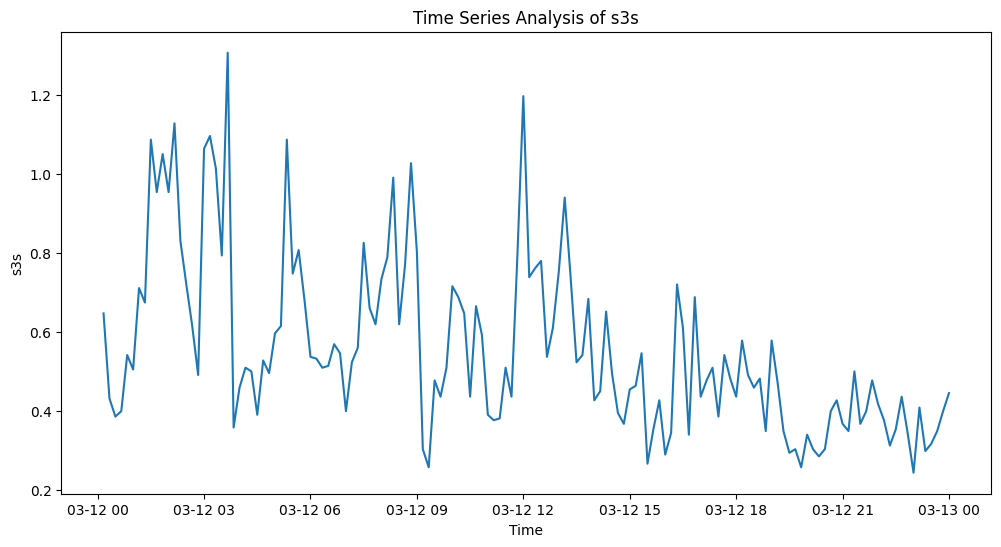

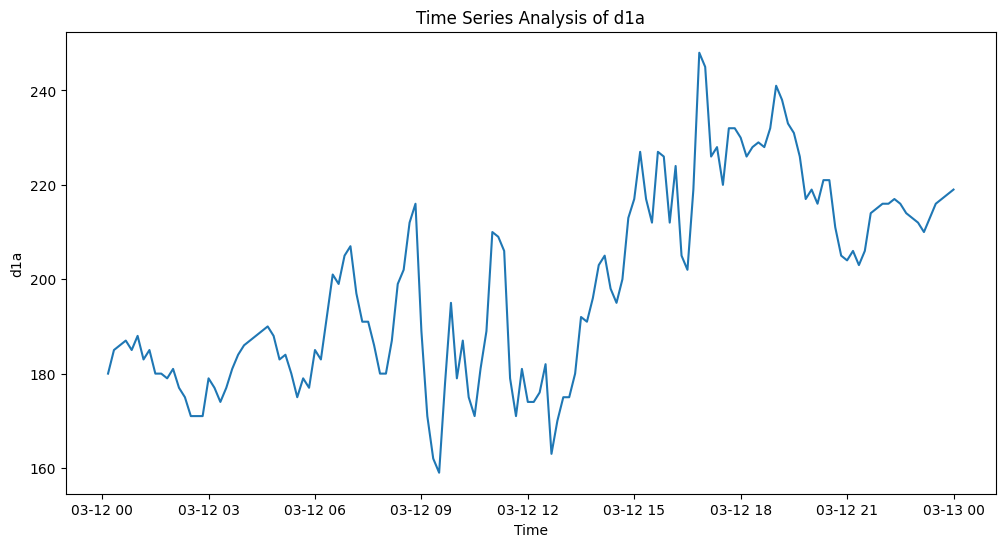

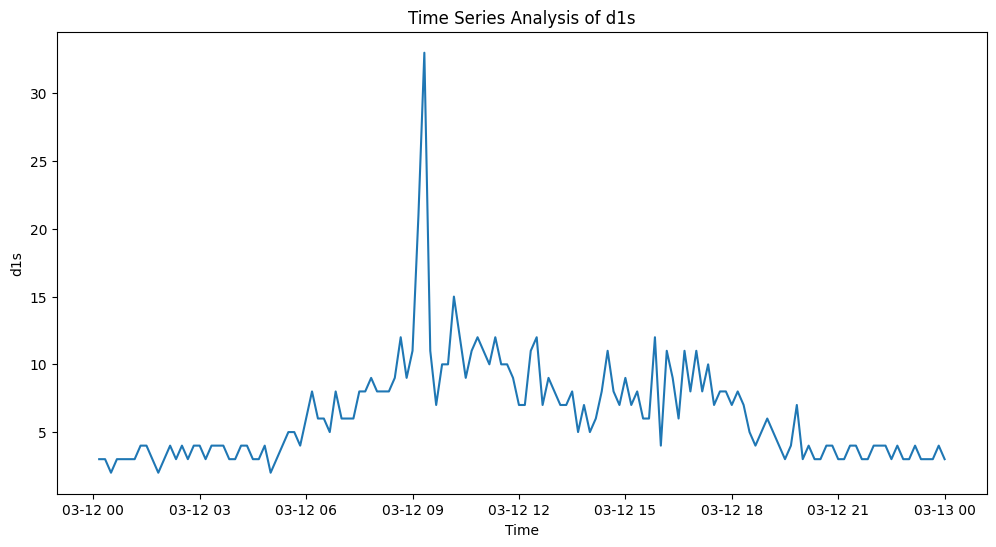

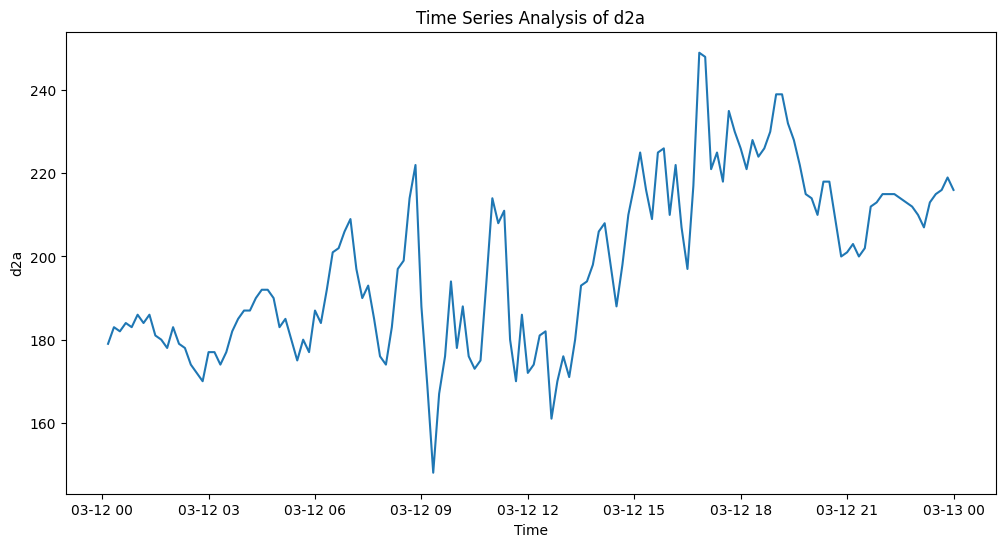

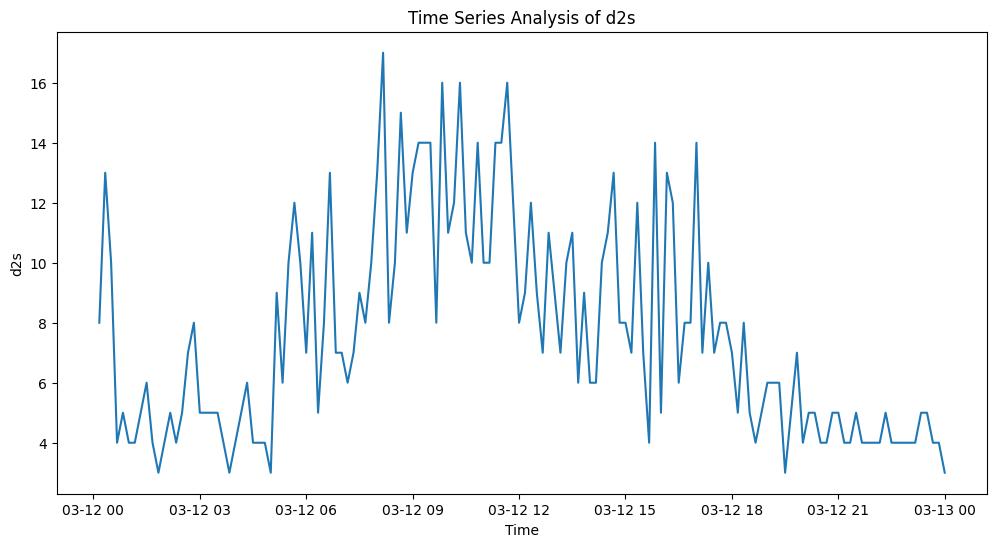

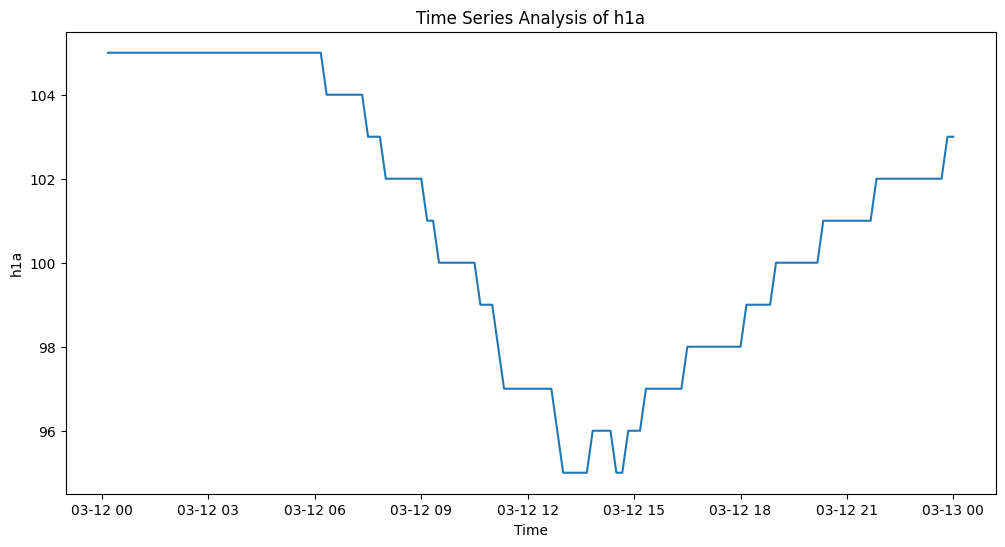

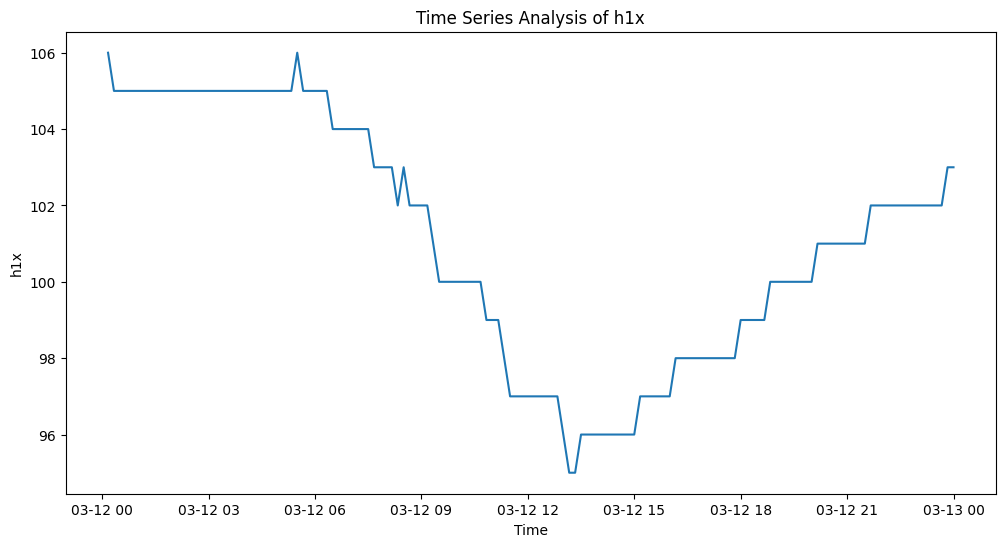

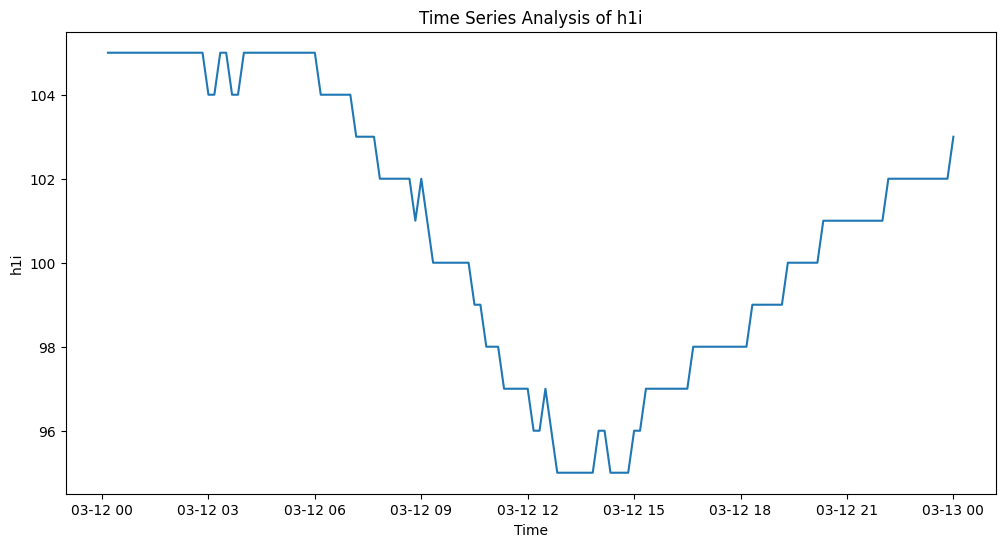

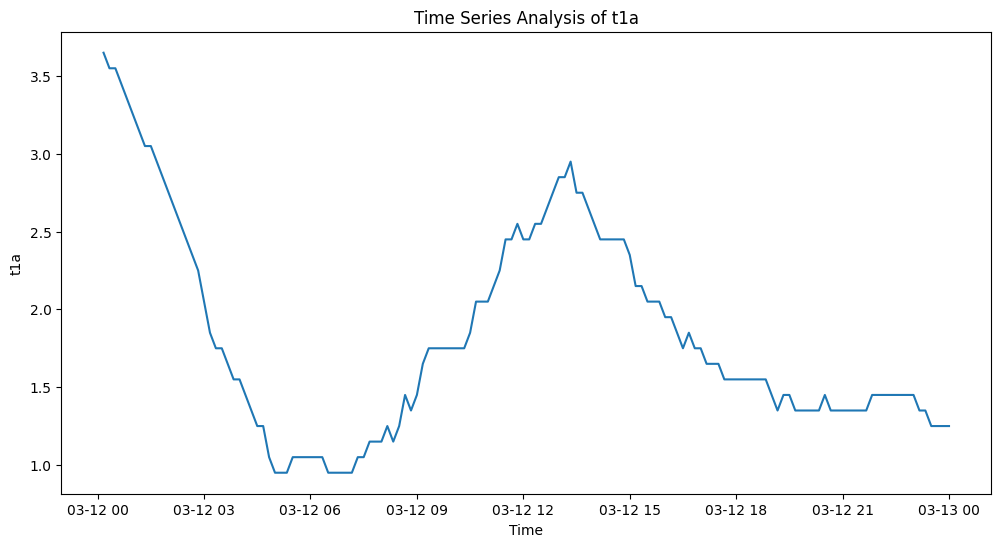

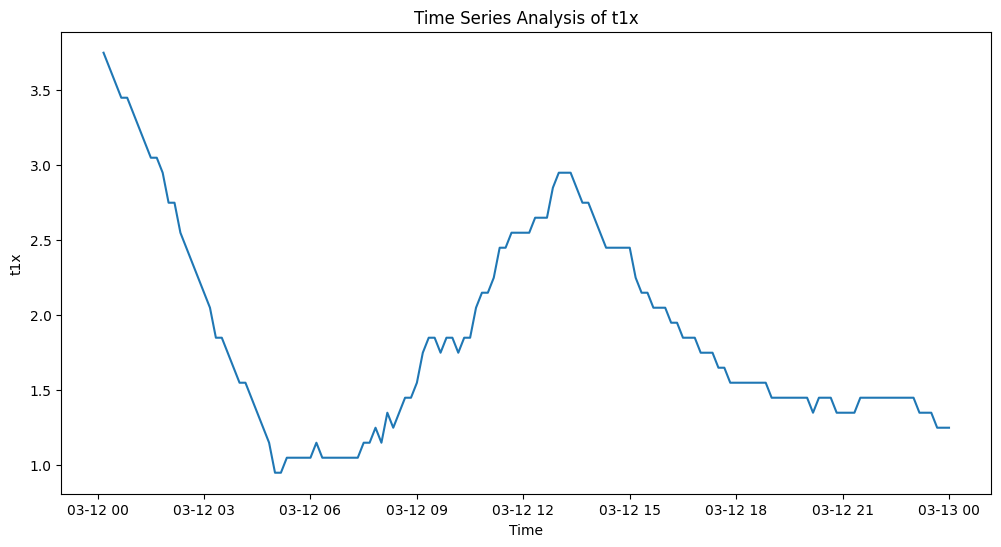

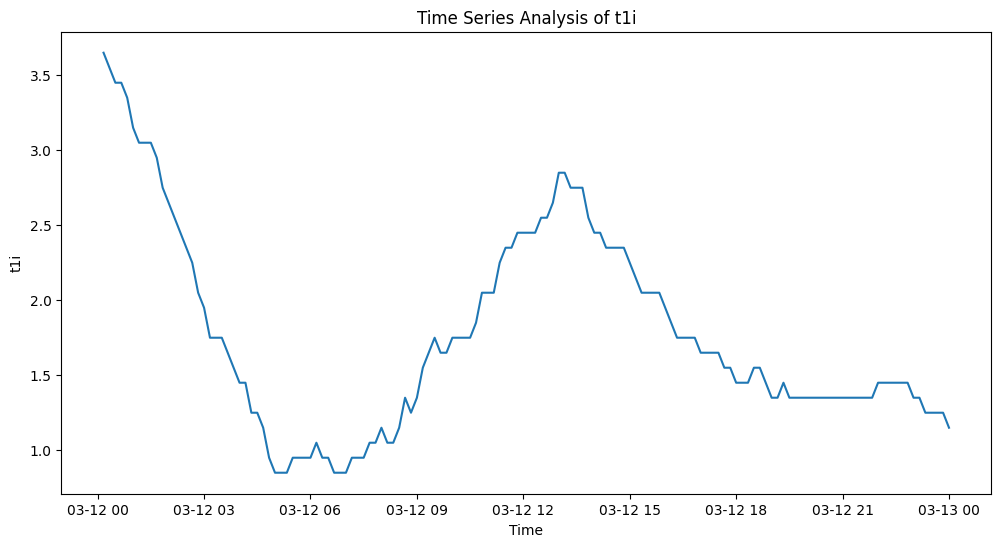

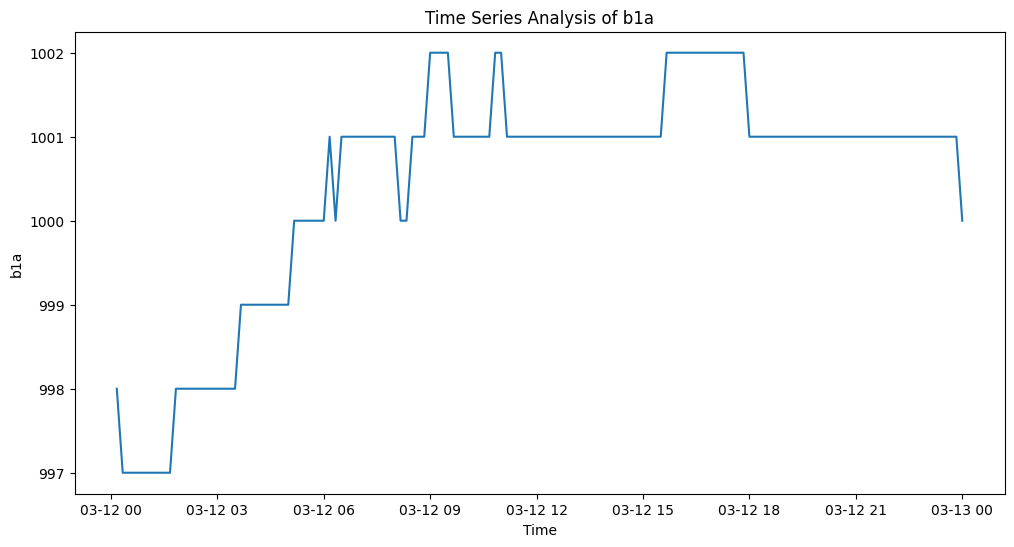

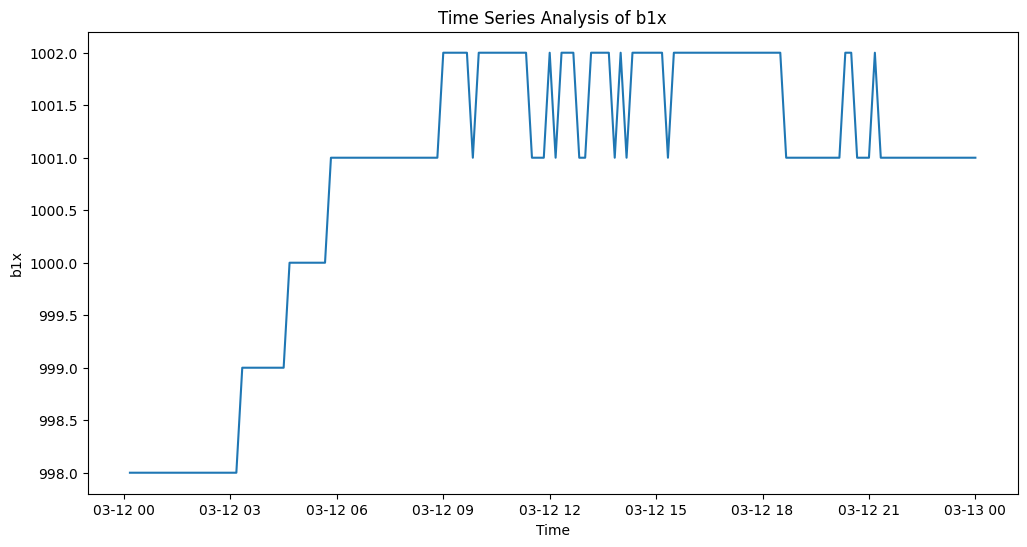

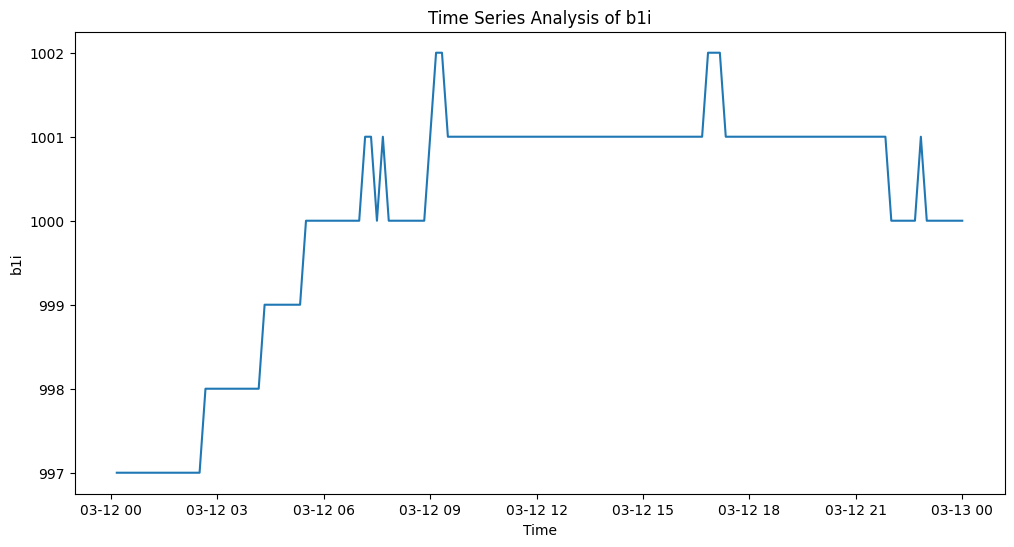

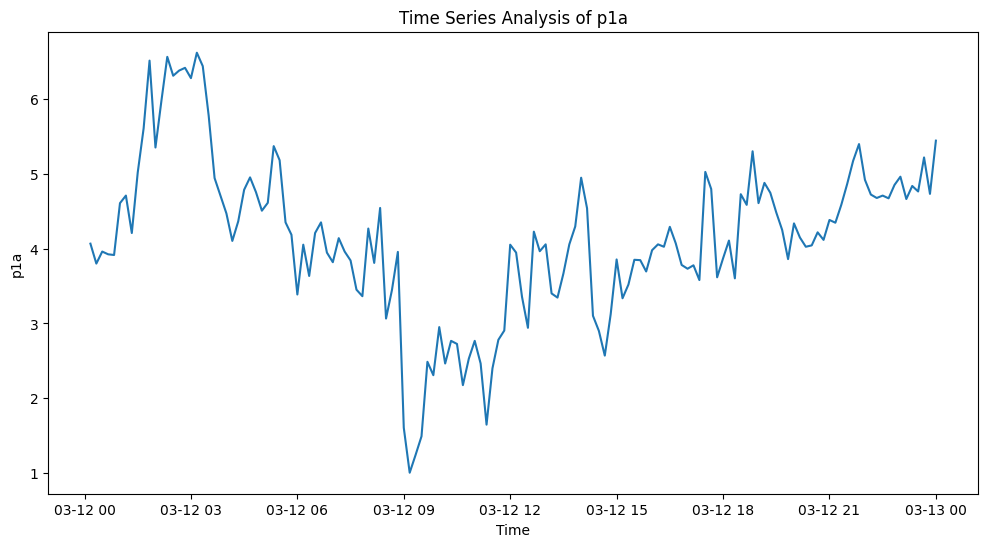

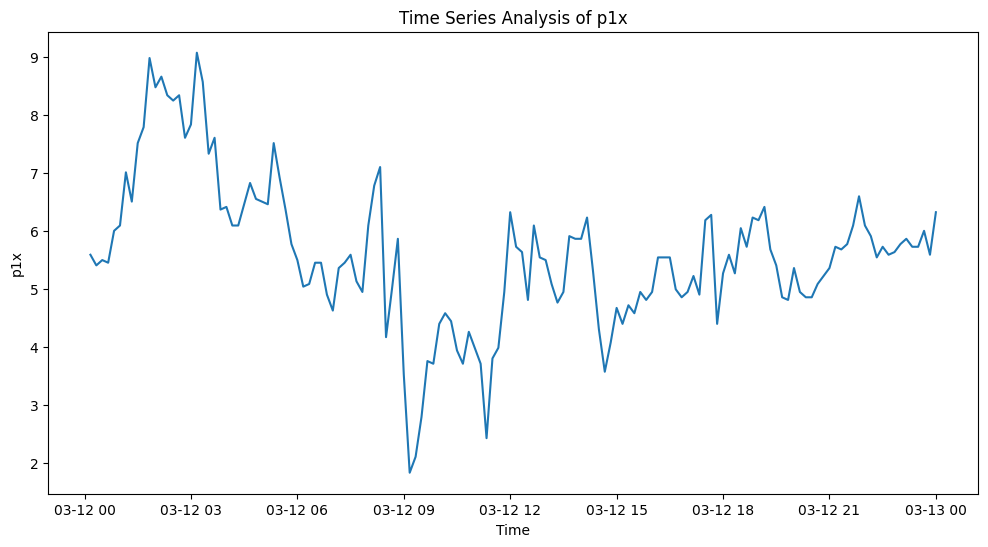

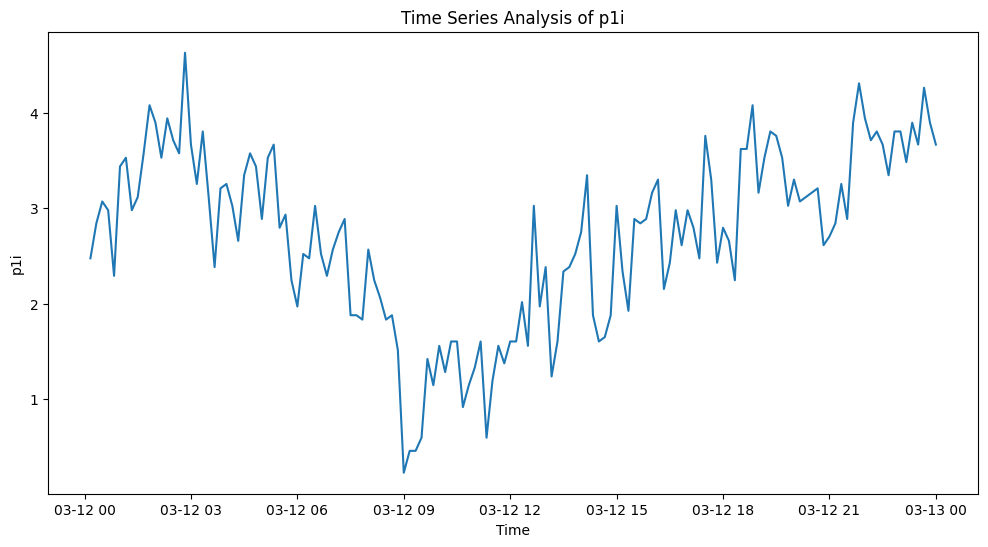

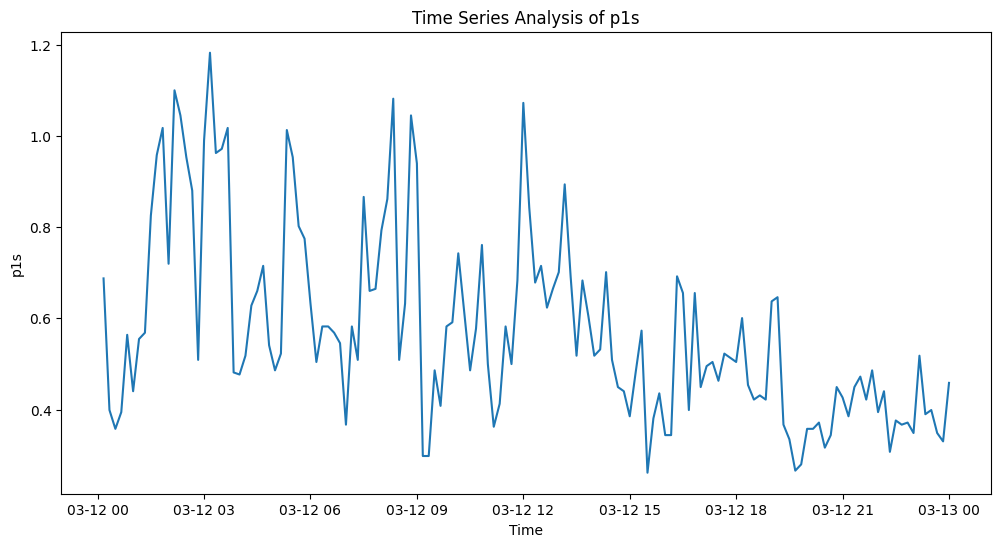

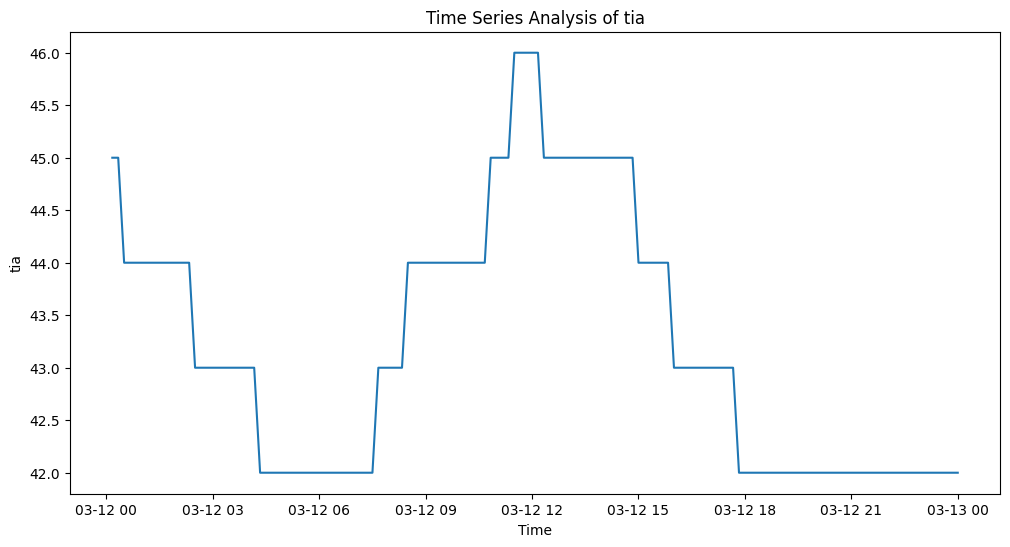

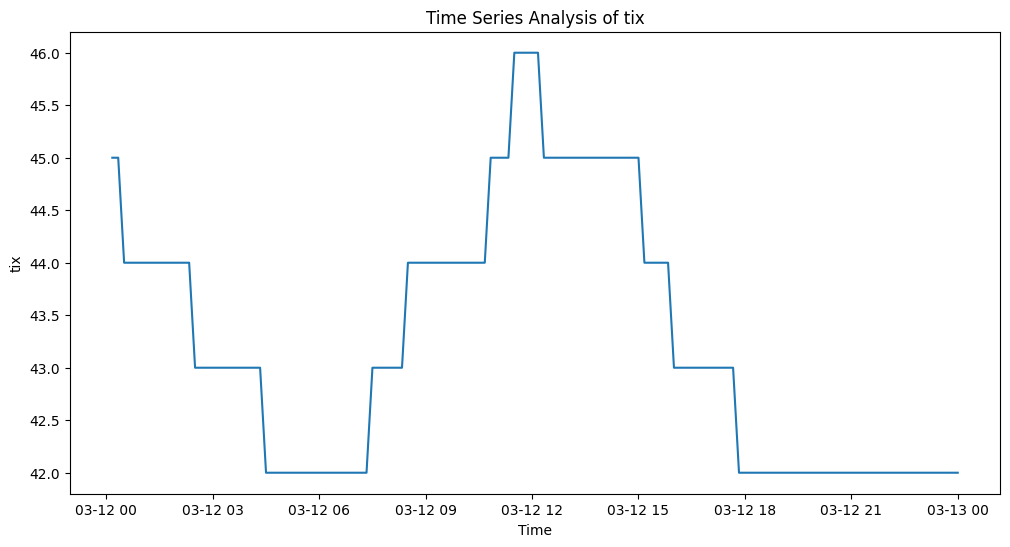

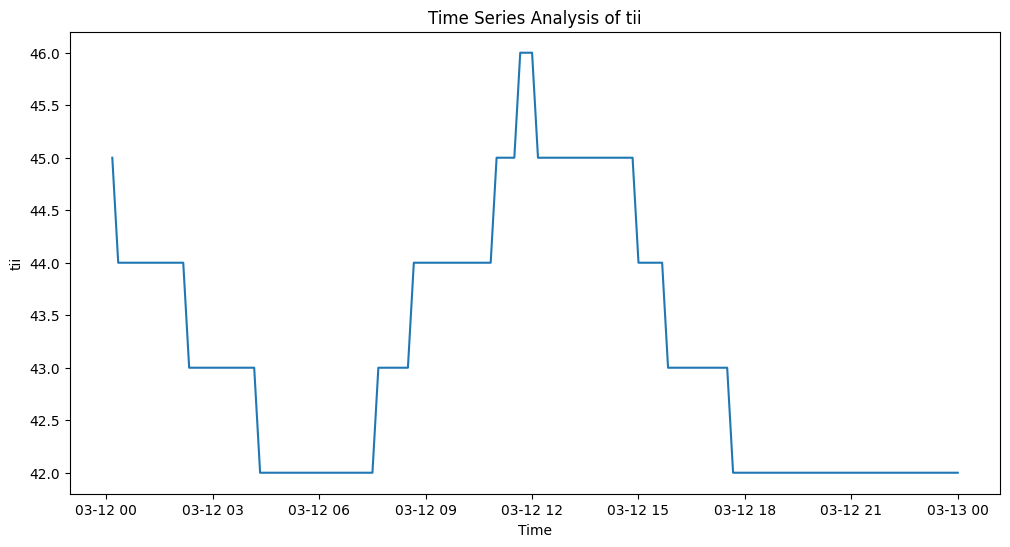

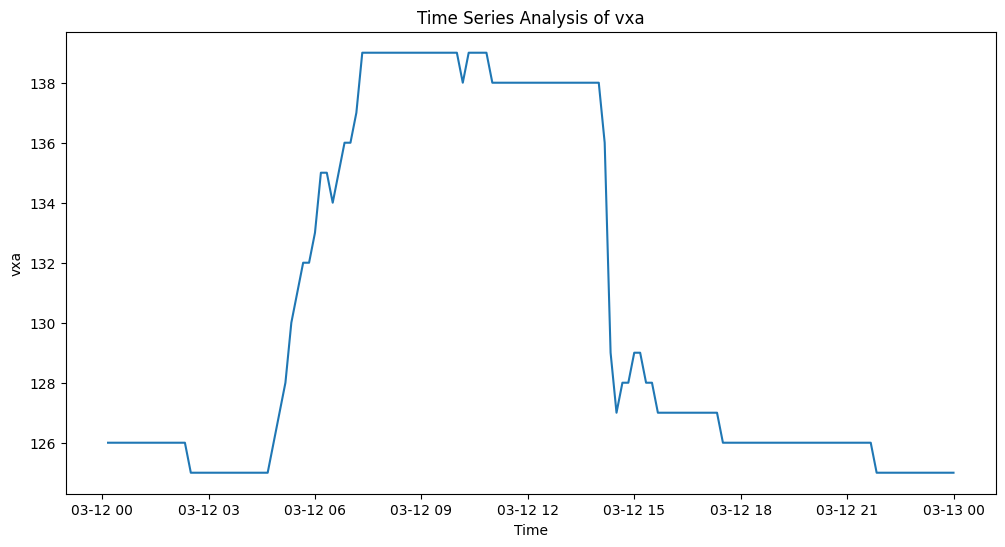

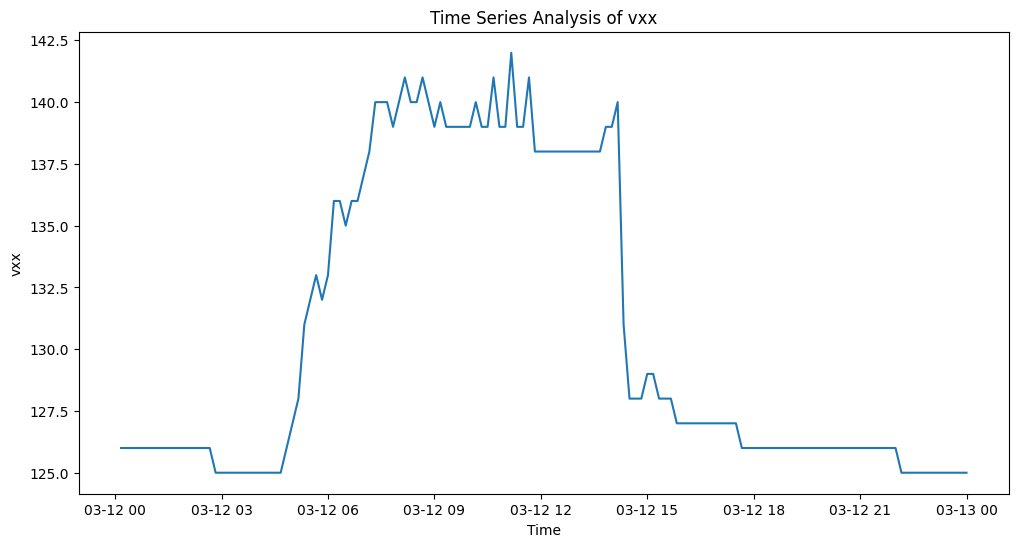

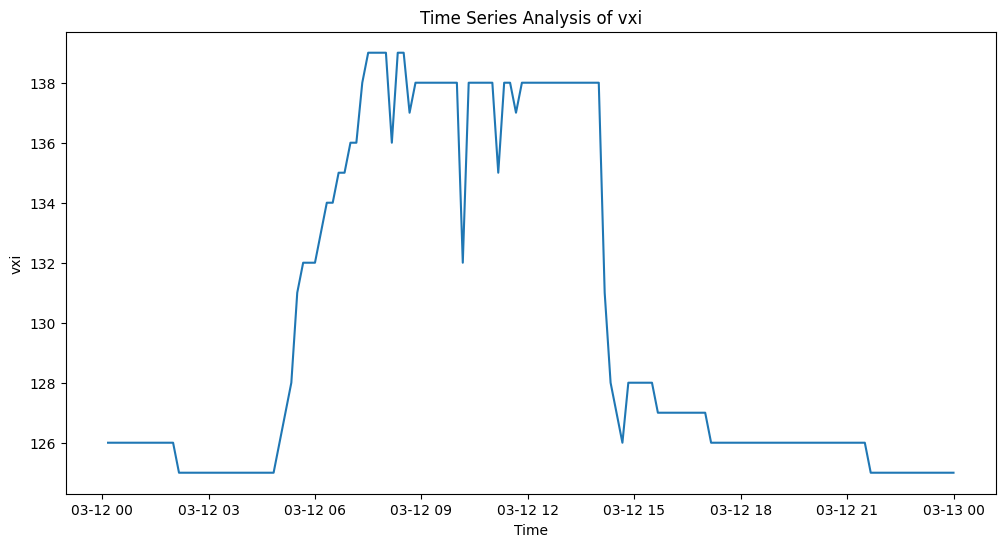

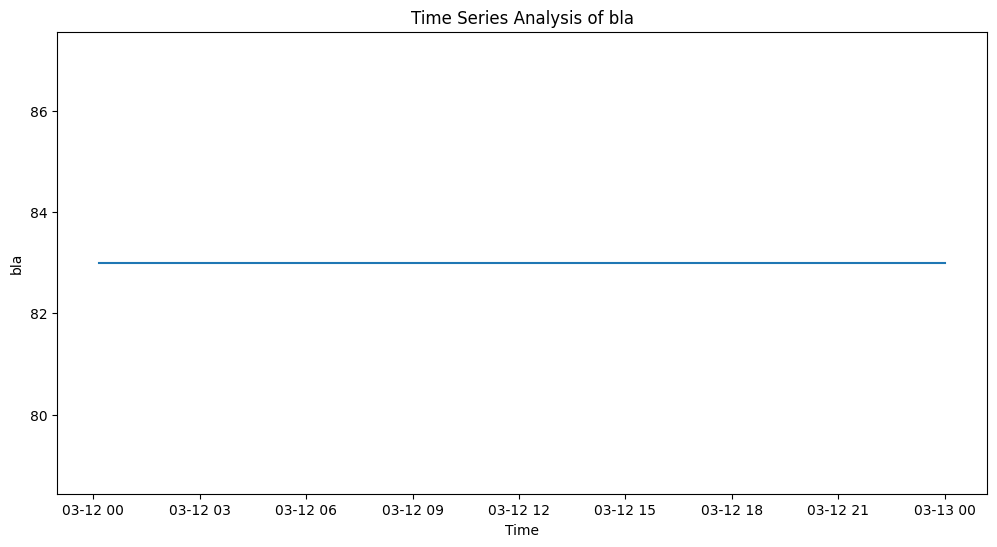

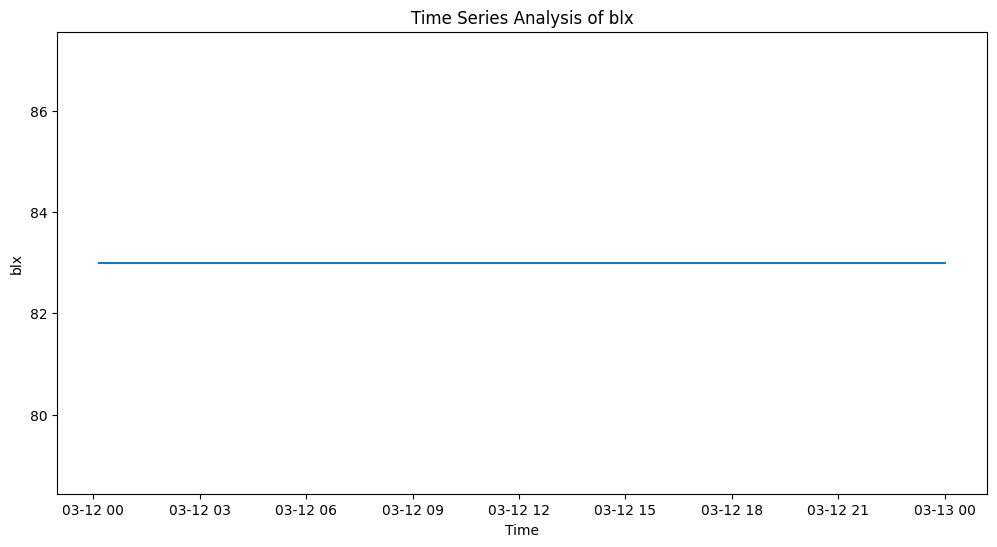

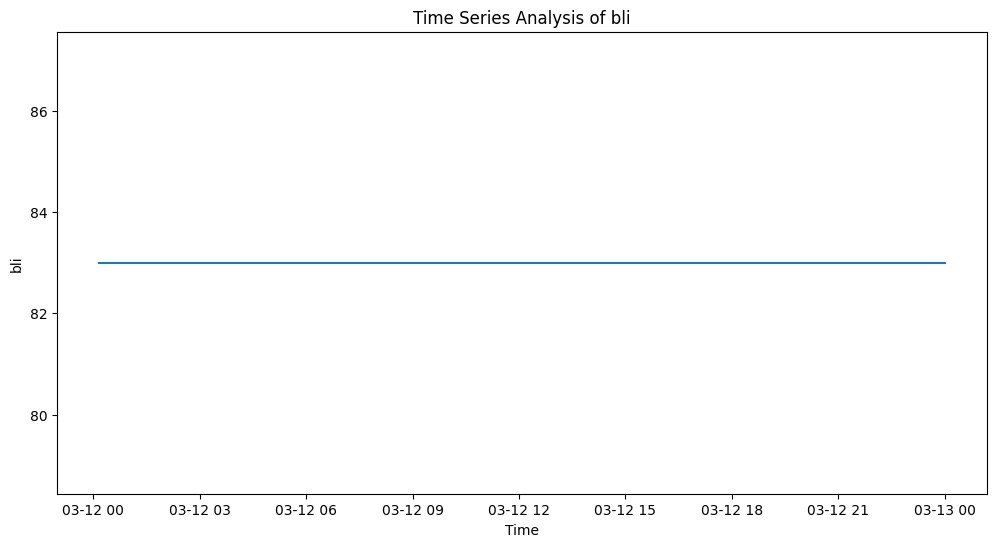

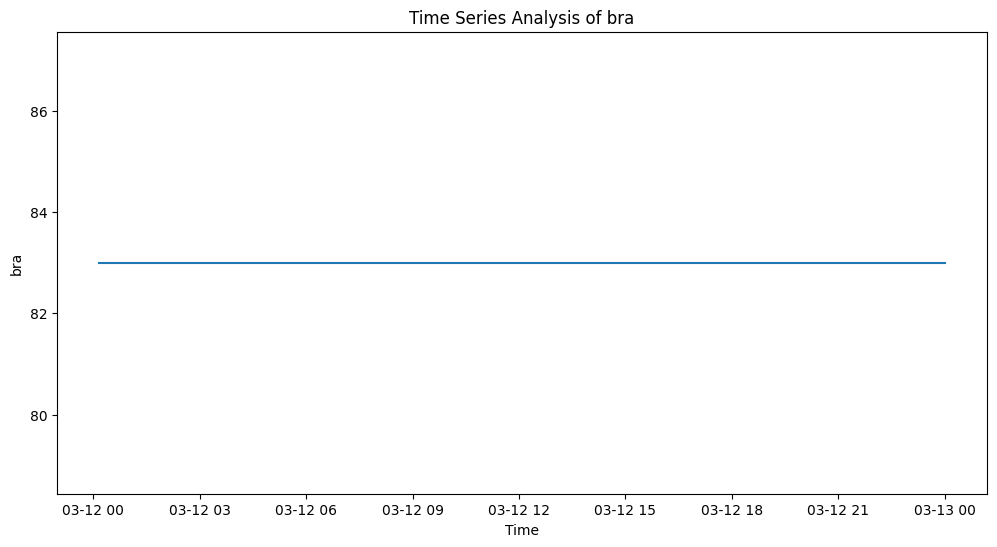

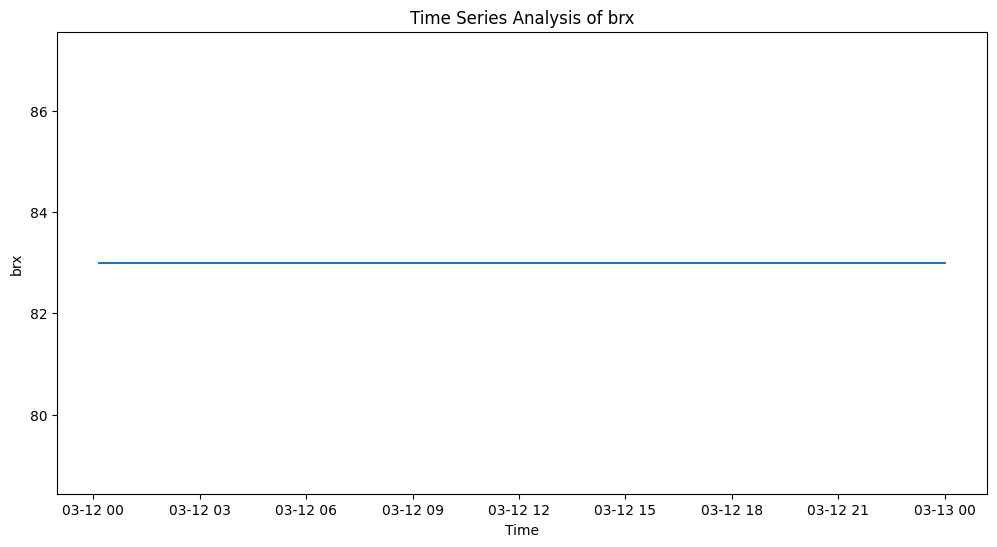

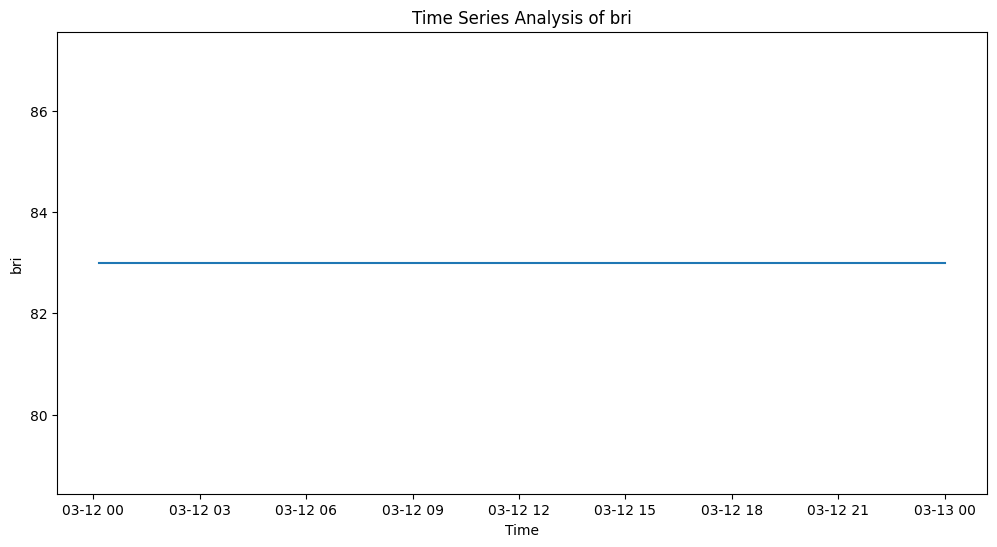

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

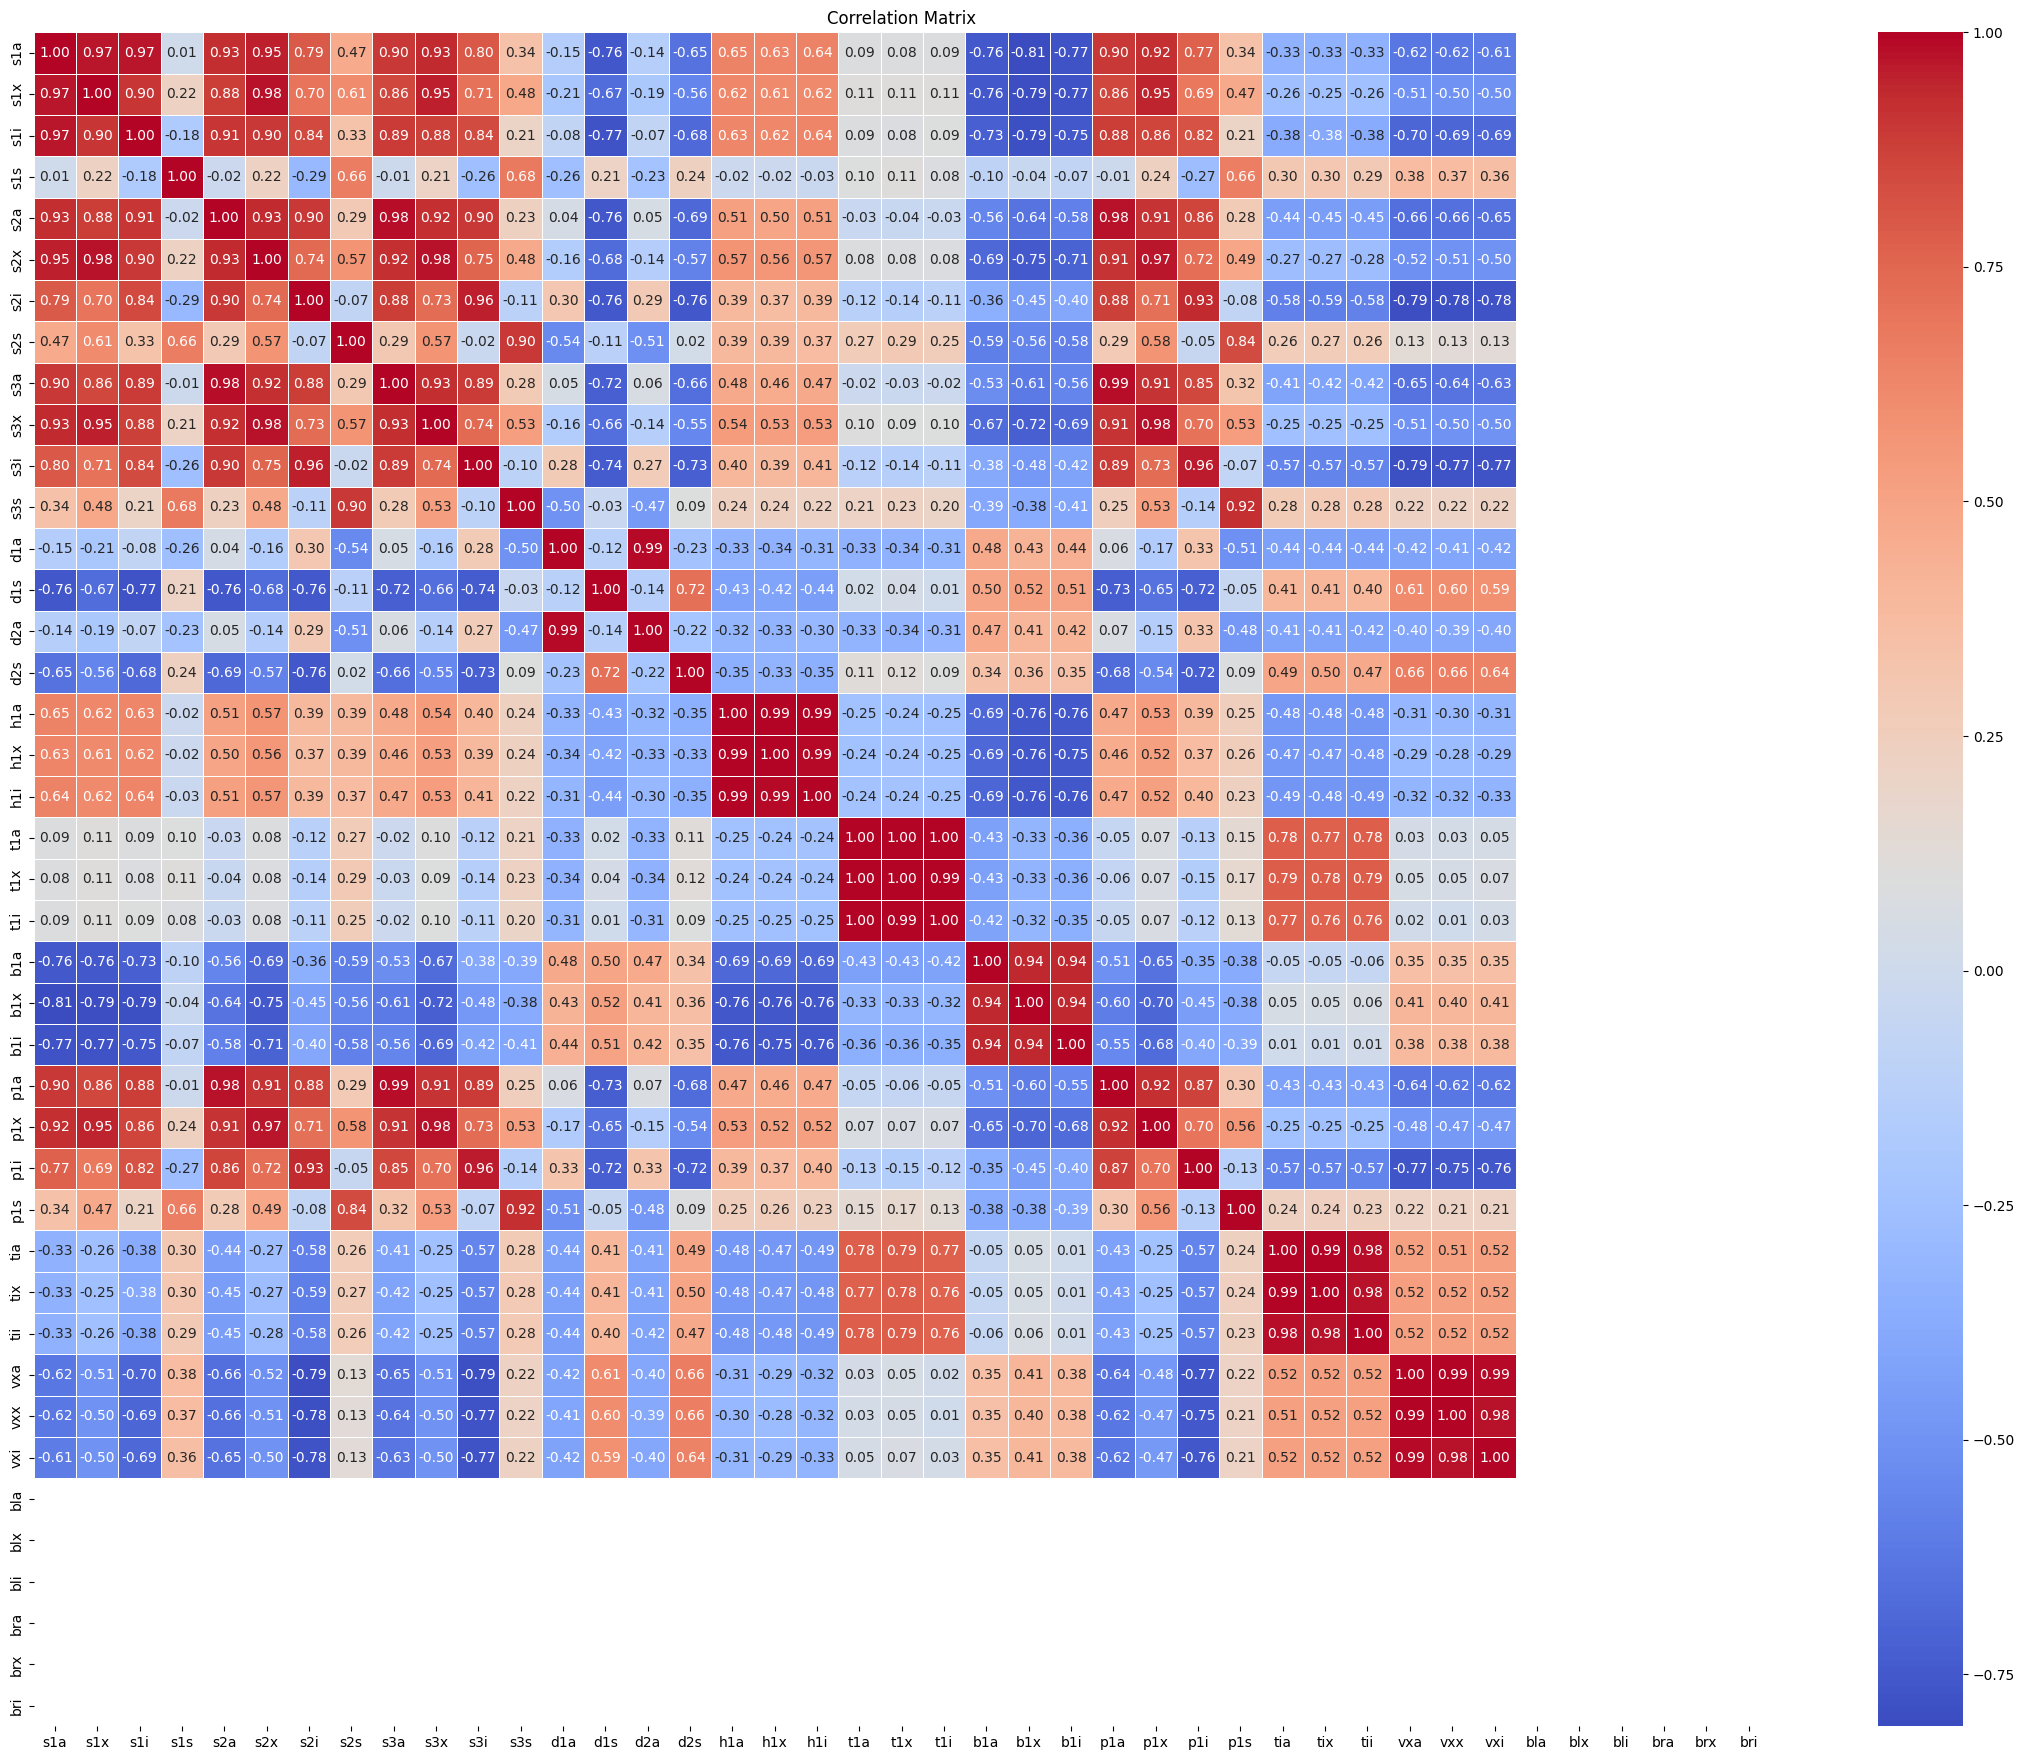

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

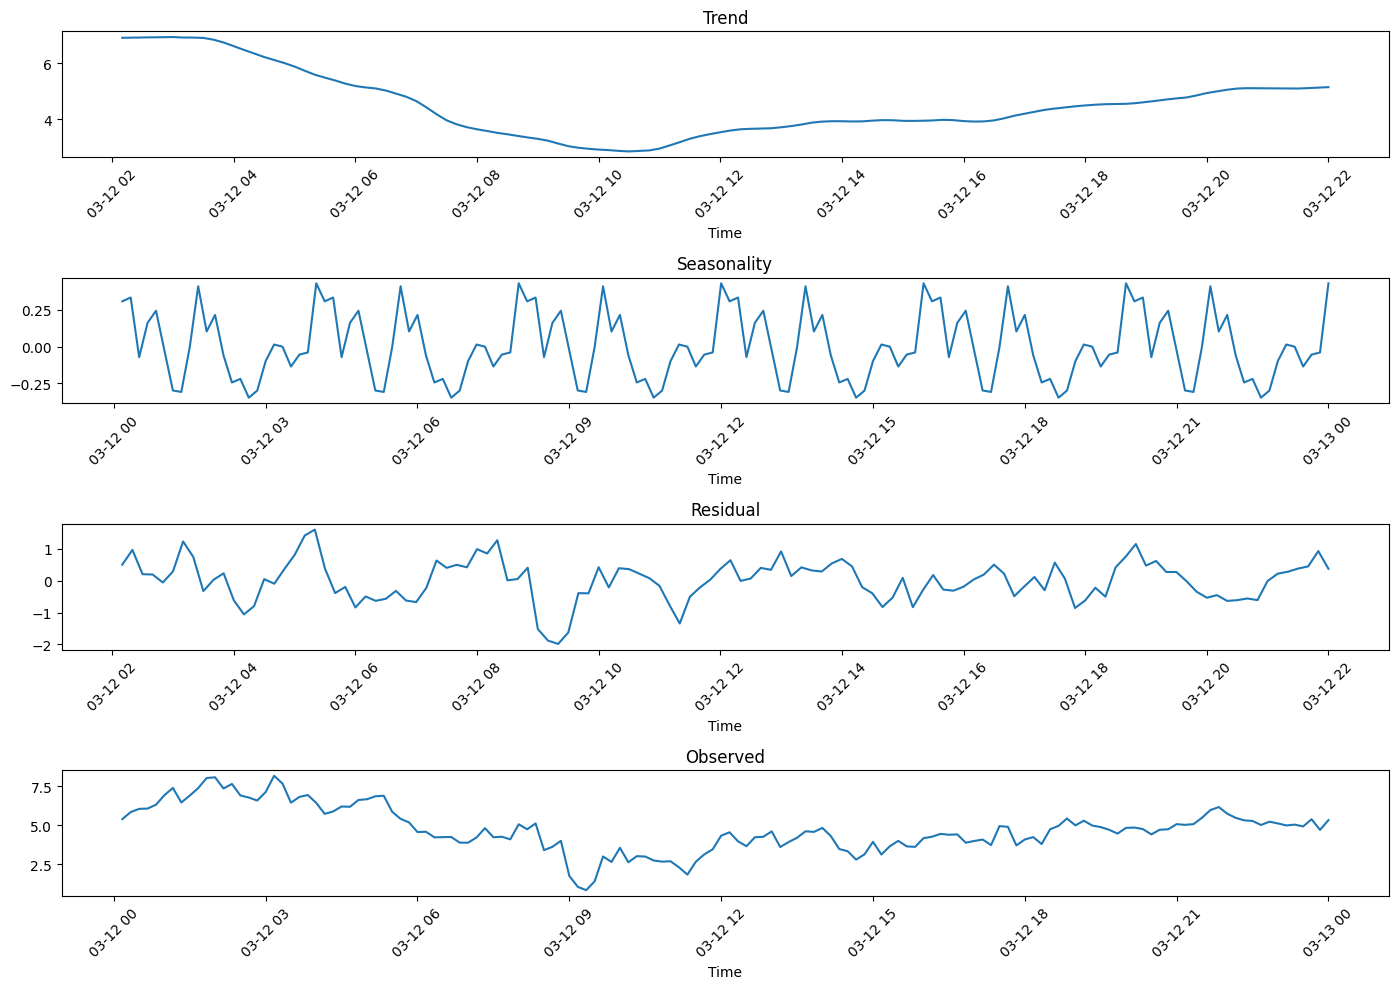

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


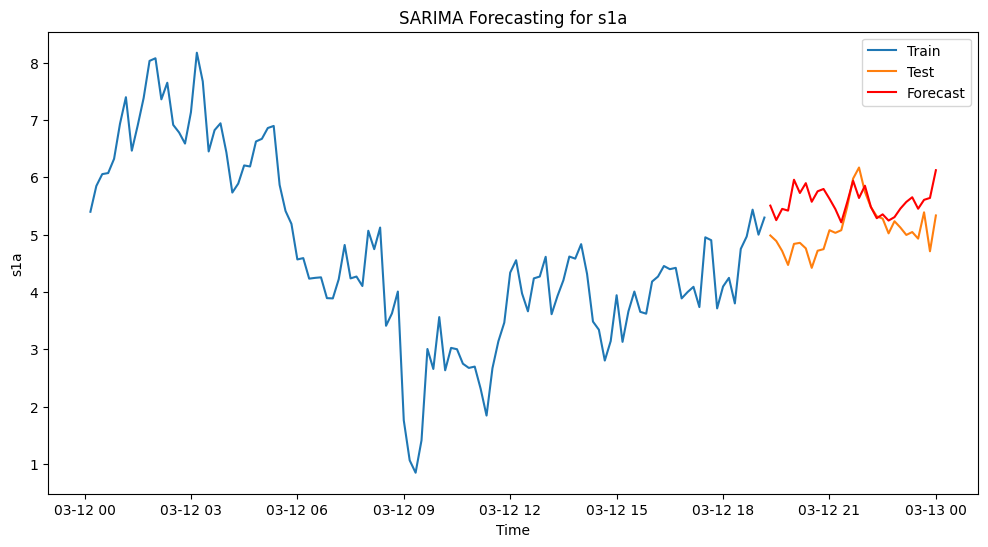

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()